# 00_EDA: Exploratory Data Analysis 🕵️‍♂️

**Start here before building your metric!**

The goal is to understand what's in the data, not to build models yet.

## Analysis Plan:
1. **Basic file inspection** - Understand data structure and columns
2. **Missing and data-type checks** - Data quality assessment
3. **Visual sampling** - Plot player positions and movement patterns
4. **Statistical summaries** - Distribution of key metrics
5. **Derived features preview** - Compute velocity, acceleration, reaction latency
6. **Outcome linkage** - Connect motion patterns to play outcomes


In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

# Set up plotting
plt.style.use('default')
sns.set_palette("husl")
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

print("🔍 EDA Environment Ready!")
print("📊 Libraries imported successfully")


🔍 EDA Environment Ready!
📊 Libraries imported successfully


## 1. Basic File Inspection 📁


In [47]:
# Load the data files
data_path = Path("../data/114239_nfl_competition_files_published_analytics_final")

# Load tracking data (Week 1 as example)
tracking = pd.read_csv(data_path / "train/input_2023_w01.csv")

# Load supplementary data (play information)
plays = pd.read_csv(data_path / "supplementary_data.csv")

print("📊 DATA OVERVIEW")
print("=" * 50)
print(f"Tracking data shape: {tracking.shape}")
print(f"Plays data shape: {plays.shape}")
print(f"Tracking memory usage: {tracking.memory_usage(deep=True).sum() / 1024**2:.1f} MB")
print(f"Plays memory usage: {plays.memory_usage(deep=True).sum() / 1024**2:.1f} MB")


📊 DATA OVERVIEW
Tracking data shape: (285714, 23)
Plays data shape: (18009, 41)
Tracking memory usage: 142.0 MB
Plays memory usage: 22.1 MB


In [48]:
# Examine plays data
print("📋 PLAYS DATA")
print("=" * 30)
plays.head()


📋 PLAYS DATA


,game_id,season,week,game_date,game_time_eastern,home_team_abbr,visitor_team_abbr,play_id,play_description,quarter,game_clock,down,yards_to_go,possession_team,defensive_team,yardline_side,yardline_number,pre_snap_home_score,pre_snap_visitor_score,play_nullified_by_penalty,pass_result,pass_length,offense_formation,receiver_alignment,route_of_targeted_receiver,play_action,dropback_type,dropback_distance,pass_location_type,defenders_in_the_box,team_coverage_man_zone,team_coverage_type,penalty_yards,pre_penalty_yards_gained,yards_gained,expected_points,expected_points_added,pre_snap_home_team_win_probability,pre_snap_visitor_team_win_probability,home_team_win_probability_added,visitor_team_win_probility_added
0,2023090700,2023,1,09/07/2023,20:20:00,KC,DET,3461,(10:46) (Shotgun) J.Goff pass deep left to J.R...,4,10:46,3,12,DET,KC,DET,23,20,14,N,C,18,EMPTY,3x2,IN,False,TRADITIONAL,5.30,INSIDE_BOX,6,ZONE_COVERAGE,COVER_2_ZONE,NaN,18,18,-0.664416,2.945847,0.834296,0.165704,-0.081149,0.081149
1,2023090700,2023,1,09/07/2023,20:20:00,KC,DET,461,(7:30) J.Goff pass short right to J.Reynolds t...,1,07:30,1,10,DET,KC,DET,34,0,0,N,C,13,SINGLEBACK,3x1,POST,True,TRADITIONAL,4.72,INSIDE_BOX,7,ZONE_COVERAGE,COVER_6_ZONE,NaN,21,21,1.926131,1.345633,0.544618,0.455382,-0.029415,0.029415
2,2023090700,2023,1,09/07/2023,20:20:00,KC,DET,1940,(:09) (Shotgun) J.Goff pass incomplete deep ri...,2,00:09,2,10,DET,KC,DET,42,14,7,N,I,18,SHOTGUN,3x1,OUT,False,TRADITIONAL,4.44,INSIDE_BOX,6,ZONE_COVERAGE,COVER_2_ZONE,NaN,0,0,0.281891,-0.081964,0.771994,0.228006,0.000791,-0.000791
3,2023090700,2023,1,09/07/2023,20:20:00,KC,DET,1711,"(:45) (No Huddle, Shotgun) P.Mahomes pass deep...",2,00:45,1,10,KC,DET,DET,30,7,7,N,C,23,SHOTGUN,3x1,CORNER,False,TRADITIONAL,5.36,INSIDE_BOX,5,ZONE_COVERAGE,COVER_2_ZONE,NaN,26,26,3.452352,2.342947,0.663187,0.336813,0.041843,-0.041843
4,2023090700,2023,1,09/07/2023,20:20:00,KC,DET,1588,(1:54) (Shotgun) P.Mahomes pass incomplete dee...,2,01:54,1,10,KC,DET,KC,43,7,7,N,I,38,SHOTGUN,2x2,POST,False,TRADITIONAL,4.59,INSIDE_BOX,6,ZONE_COVERAGE,COVER_4_ZONE,NaN,0,0,1.921525,-0.324035,0.615035,0.384965,0.000061,-0.000061


In [49]:
# Examine tracking data
print("🎯 TRACKING DATA")
print("=" * 30)
tracking.head()


🎯 TRACKING DATA


,game_id,play_id,player_to_predict,nfl_id,frame_id,play_direction,absolute_yardline_number,player_name,player_height,player_weight,player_birth_date,player_position,player_side,player_role,x,y,s,a,dir,o,num_frames_output,ball_land_x,ball_land_y
0,2023090700,101,False,54527,1,right,42,Bryan Cook,6-1,210,1999-09-07,FS,Defense,Defensive Coverage,52.33,36.94,0.09,0.39,322.40,238.24,21,63.259998,-0.22
1,2023090700,101,False,54527,2,right,42,Bryan Cook,6-1,210,1999-09-07,FS,Defense,Defensive Coverage,52.33,36.94,0.04,0.61,200.89,236.05,21,63.259998,-0.22
2,2023090700,101,False,54527,3,right,42,Bryan Cook,6-1,210,1999-09-07,FS,Defense,Defensive Coverage,52.33,36.93,0.12,0.73,147.55,240.60,21,63.259998,-0.22
3,2023090700,101,False,54527,4,right,42,Bryan Cook,6-1,210,1999-09-07,FS,Defense,Defensive Coverage,52.35,36.92,0.23,0.81,131.40,244.25,21,63.259998,-0.22
4,2023090700,101,False,54527,5,right,42,Bryan Cook,6-1,210,1999-09-07,FS,Defense,Defensive Coverage,52.37,36.90,0.35,0.82,123.26,244.25,21,63.259998,-0.22


In [50]:
# Detailed tracking data info
print("📊 TRACKING DATA INFO")
print("=" * 30)
tracking.info()


📊 TRACKING DATA INFO
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285714 entries, 0 to 285713
Data columns (total 23 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   game_id                   285714 non-null  int64  
 1   play_id                   285714 non-null  int64  
 2   player_to_predict         285714 non-null  bool   
 3   nfl_id                    285714 non-null  int64  
 4   frame_id                  285714 non-null  int64  
 5   play_direction            285714 non-null  object 
 6   absolute_yardline_number  285714 non-null  int64  
 7   player_name               285714 non-null  object 
 8   player_height             285714 non-null  object 
 9   player_weight             285714 non-null  int64  
 10  player_birth_date         285714 non-null  object 
 11  player_position           285714 non-null  object 
 12  player_side               285714 non-null  object 
 13  player_role            

In [51]:
# Statistical summary of tracking data
print("📈 TRACKING DATA DESCRIBE")
print("=" * 30)
tracking.describe()


📈 TRACKING DATA DESCRIBE


,game_id,play_id,nfl_id,frame_id,absolute_yardline_number,player_weight,x,y,s,a,dir,o,num_frames_output,ball_land_x,ball_land_y
count,2.857140e+05,285714.000000,285714.000000,285714.000000,285714.000000,285714.000000,285714.000000,285714.000000,285714.000000,285714.000000,285714.000000,285714.000000,285714.000000,285714.000000,285714.000000
mean,2.023091e+09,2284.758118,49278.353829,16.055010,60.343049,211.784074,60.466355,26.751004,3.041966,2.126249,177.926268,181.198227,11.298669,60.851685,26.215487
std,8.575269e+01,1239.145629,5173.118005,10.689869,23.534325,21.965350,24.007917,10.035753,2.231126,1.430355,100.934248,98.972312,5.727945,25.759902,15.275341
min,2.023091e+09,55.000000,34452.000000,1.000000,11.000000,153.000000,1.210000,0.970000,0.000000,0.000000,0.000000,0.000000,5.000000,1.330000,-1.690000
25%,2.023091e+09,1232.000000,44995.000000,8.000000,40.000000,195.000000,41.630000,18.900000,1.120000,1.010000,89.530000,89.930000,8.000000,41.730000,12.640000
50%,2.023091e+09,2263.000000,48456.000000,15.000000,59.000000,208.000000,58.810000,26.710000,2.730000,1.920000,173.365000,182.230000,10.000000,59.060001,25.450001
75%,2.023091e+09,3302.000000,53609.000000,23.000000,79.000000,226.000000,78.520000,34.530000,4.650000,3.050000,269.580000,271.320000,13.000000,78.970001,39.250000
max,2.023091e+09,4699.000000,56663.000000,74.000000,109.000000,347.000000,119.860000,52.430000,12.530000,17.120000,359.990000,359.990000,94.000000,119.779999,57.330002


## 2. Missing Data and Data-Type Checks 🔍


In [52]:
# Check for missing values in tracking data
print("❓ MISSING VALUES IN TRACKING DATA")
print("=" * 40)
missing_tracking = tracking.isnull().sum()
print(missing_tracking[missing_tracking > 0])

print(f"\n📊 Total missing values: {missing_tracking.sum()}")
print(f"📊 Percentage missing: {(missing_tracking.sum() / (tracking.shape[0] * tracking.shape[1]) * 100):.2f}%")


❓ MISSING VALUES IN TRACKING DATA
Series([], dtype: int64)

📊 Total missing values: 0
📊 Percentage missing: 0.00%


🎯 Sample Play Analysis: Play ID 58
Frames in play: 228
Players in play: 12


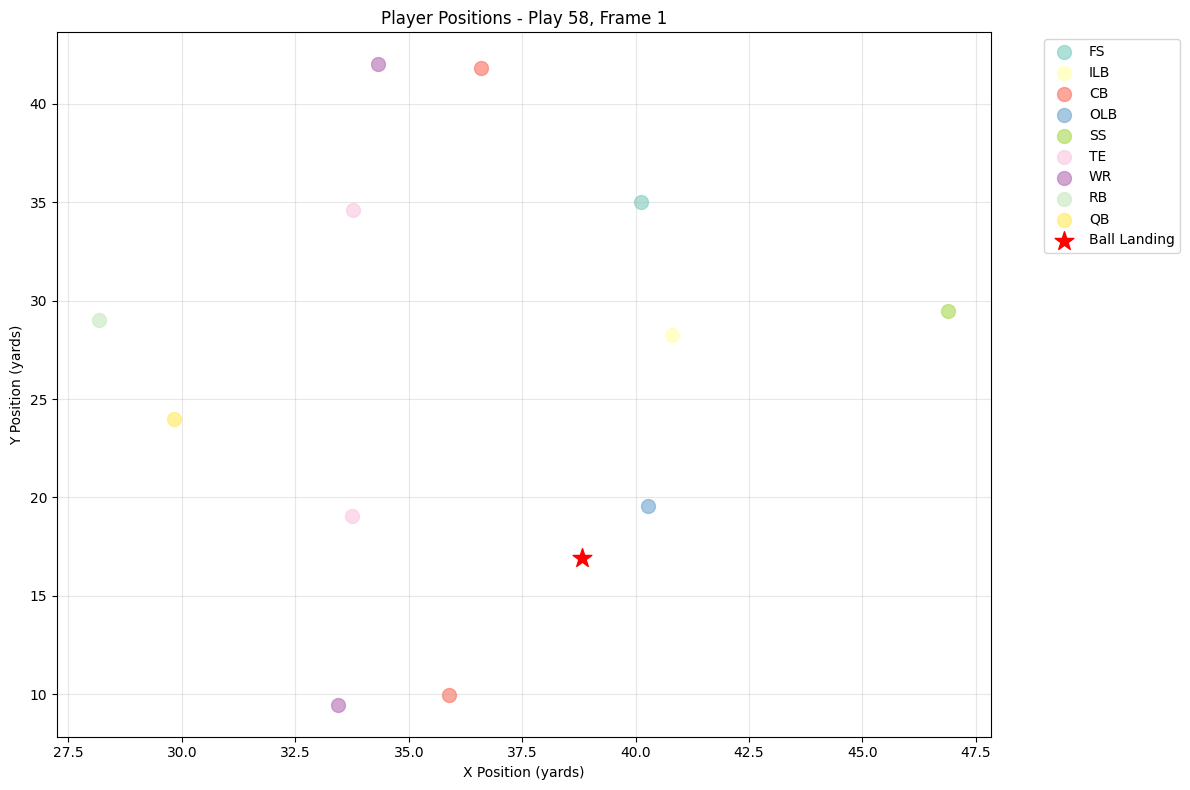

In [53]:
# CHANGED: Now analyzing Play ID 58 (completed pass to S.Diggs on SLANT route)
sample_play_id = 58
sample_play_data = tracking[tracking['play_id'] == sample_play_id]

print(f"🎯 Sample Play Analysis: Play ID {sample_play_id}")
print(f"Frames in play: {len(sample_play_data)}")
print(f"Players in play: {sample_play_data['nfl_id'].nunique()}")

# Create position plot for one frame
frame_1_data = sample_play_data[sample_play_data['frame_id'] == 1]

fig, ax = plt.subplots(figsize=(12, 8))

# Plot different positions with different colors
positions = frame_1_data['player_position'].unique()
colors = plt.cm.Set3(np.linspace(0, 1, len(positions)))

for i, pos in enumerate(positions):
    pos_data = frame_1_data[frame_1_data['player_position'] == pos]
    ax.scatter(pos_data['x'], pos_data['y'], 
               label=pos, color=colors[i], s=100, alpha=0.7)

# Mark ball landing point
ball_x = frame_1_data['ball_land_x'].iloc[0]
ball_y = frame_1_data['ball_land_y'].iloc[0]
ax.scatter(ball_x, ball_y, color='red', s=200, marker='*', 
           label='Ball Landing', zorder=5)

ax.set_xlabel('X Position (yards)')
ax.set_ylabel('Y Position (yards)')
ax.set_title(f'Player Positions - Play {sample_play_id}, Frame 1')
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


In [54]:
# Play details for Play ID 58
print("🔍 PLAY INVESTIGATION")
print("=" * 30)

# Get the specific play details
play_details = plays[plays['play_id'] == sample_play_id]

if len(play_details) > 0:
    play_info = play_details.iloc[0]
    print(f"Play ID: {sample_play_id}")
    print(f"Description: {play_info['play_description']}")
    print(f"Pass Result: {play_info['pass_result']}")
    print(f"Targeted Receiver Route: {play_info['route_of_targeted_receiver']}")
    print(f"Pass Location: {play_info['pass_location_type']}")
    
    print(f"\nAll Offensive Players in Play:")
    offensive_players = sample_play_data[sample_play_data['player_side'] == 'Offense']['player_name'].unique()
    for player in offensive_players:
        player_pos = sample_play_data[sample_play_data['player_name'] == player]['player_position'].iloc[0]
        print(f"  {player} ({player_pos})")
    
    # Calculate distances from ball landing
    frame_1_data = sample_play_data[sample_play_data['frame_id'] == 1]
    ball_x = frame_1_data['ball_land_x'].iloc[0]
    ball_y = frame_1_data['ball_land_y'].iloc[0]
    
    print(f"\nDistances from Ball Landing:")
    for _, player in frame_1_data.iterrows():
        if player['player_side'] == 'Offense':
            distance = np.sqrt((player['x'] - ball_x)**2 + (player['y'] - ball_y)**2)
            print(f"  {player['player_name']}: {distance:.1f} yards")
else:
    print(f"No play details found for Play ID {sample_play_id}")


🔍 PLAY INVESTIGATION
Play ID: 58
Description: (15:00) (Shotgun) J.Allen pass short right to S.Diggs to BUF 32 for 7 yards (A.Gardner).
Pass Result: C
Targeted Receiver Route: SLANT
Pass Location: INSIDE_BOX

All Offensive Players in Play:
  Dalton Kincaid (TE)
  Dawson Knox (TE)
  Gabe Davis (WR)
  James Cook (RB)
  Josh Allen (QB)
  Stefon Diggs (WR)

Distances from Ball Landing:
  Dalton Kincaid: 18.4 yards
  Dawson Knox: 5.5 yards
  Gabe Davis: 25.5 yards
  James Cook: 16.1 yards
  Josh Allen: 11.4 yards
  Stefon Diggs: 9.2 yards


🏃‍♂️ WIDE RECEIVER MOVEMENT ANALYSIS - Play ID 58
Wide Receivers in play: 2
Frames analyzed: 19

Wide Receivers:
  - Gabe Davis (ID: 52536, Side: Offense)
  - Stefon Diggs (ID: 42489, Side: Offense)


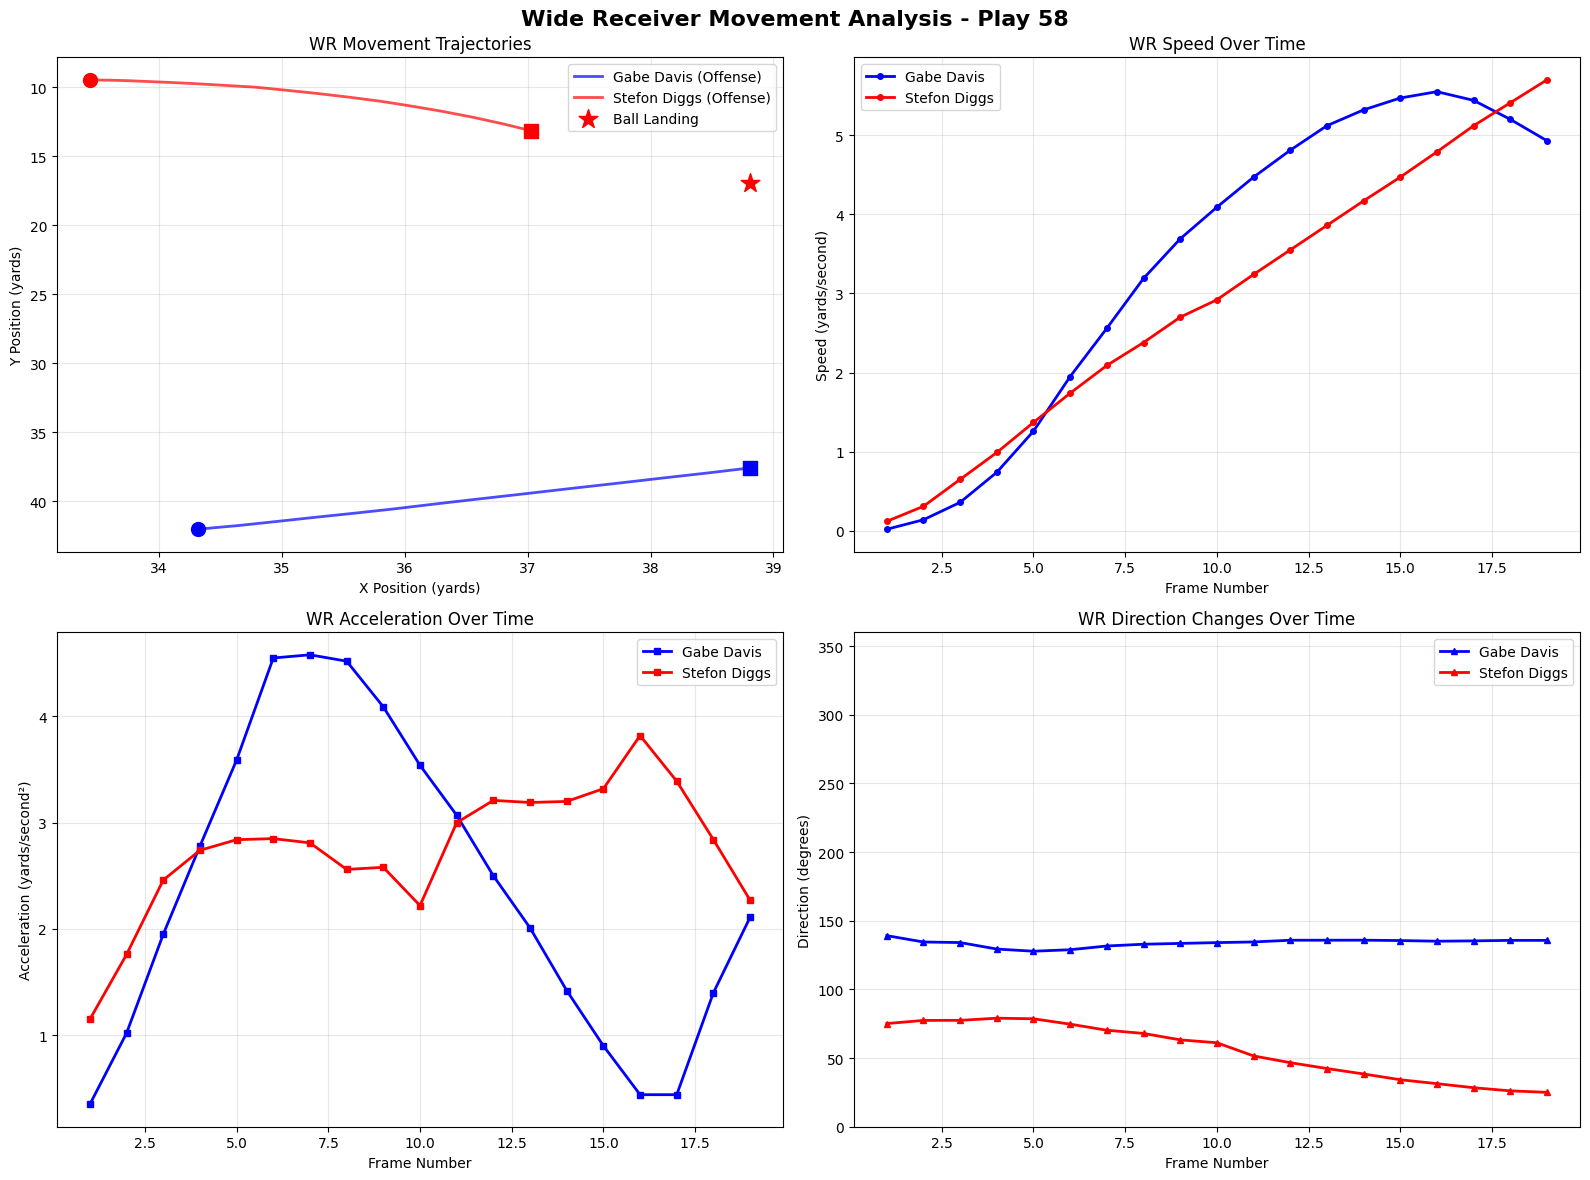

In [55]:
# Wide Receiver Movement Analysis for Play ID 58
print("🏃‍♂️ WIDE RECEIVER MOVEMENT ANALYSIS - Play ID 58")
print("=" * 60)

# Focus on wide receivers for this play
wr_data = sample_play_data[sample_play_data['player_position'] == 'WR']

print(f"Wide Receivers in play: {wr_data['nfl_id'].nunique()}")
print(f"Frames analyzed: {wr_data['frame_id'].max()}")

# Get unique wide receivers
unique_wrs = wr_data['nfl_id'].unique()
print(f"\nWide Receivers:")
for wr_id in unique_wrs:
    wr_name = wr_data[wr_data['nfl_id'] == wr_id]['player_name'].iloc[0]
    wr_side = wr_data[wr_data['nfl_id'] == wr_id]['player_side'].iloc[0]
    print(f"  - {wr_name} (ID: {wr_id}, Side: {wr_side})")

# Create comprehensive WR movement analysis
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle(f'Wide Receiver Movement Analysis - Play {sample_play_id}', fontsize=16, fontweight='bold')

# Plot 1: WR Trajectories (X-Y Movement)
ax1 = axes[0, 0]
colors = ['blue', 'red', 'green', 'orange', 'purple']
for i, wr_id in enumerate(unique_wrs):
    wr_trajectory = wr_data[wr_data['nfl_id'] == wr_id].sort_values('frame_id')
    wr_name = wr_trajectory['player_name'].iloc[0]
    wr_side = wr_trajectory['player_side'].iloc[0]
    
    ax1.plot(wr_trajectory['x'], wr_trajectory['y'], 
             color=colors[i % len(colors)], linewidth=2, alpha=0.7,
             label=f'{wr_name} ({wr_side})')
    
    # Mark start and end points
    ax1.scatter(wr_trajectory['x'].iloc[0], wr_trajectory['y'].iloc[0], 
                color=colors[i % len(colors)], s=100, marker='o', zorder=5)
    ax1.scatter(wr_trajectory['x'].iloc[-1], wr_trajectory['y'].iloc[-1], 
                color=colors[i % len(colors)], s=100, marker='s', zorder=5)

# Mark ball landing point
ball_x = wr_data['ball_land_x'].iloc[0]
ball_y = wr_data['ball_land_y'].iloc[0]
ax1.scatter(ball_x, ball_y, color='red', s=200, marker='*', 
           label='Ball Landing', zorder=6)

ax1.set_xlabel('X Position (yards)')
ax1.set_ylabel('Y Position (yards)')
ax1.set_title('WR Movement Trajectories')
ax1.legend()
ax1.grid(True, alpha=0.3)
ax1.invert_yaxis()  # Invert Y-axis to match football field orientation

# Plot 2: Speed over time for each WR
ax2 = axes[0, 1]
for i, wr_id in enumerate(unique_wrs):
    wr_speed = wr_data[wr_data['nfl_id'] == wr_id].sort_values('frame_id')
    wr_name = wr_speed['player_name'].iloc[0]
    
    frames = wr_speed['frame_id']
    speeds = wr_speed['s']  # speed in yards per second
    
    ax2.plot(frames, speeds, color=colors[i % len(colors)], 
             linewidth=2, label=wr_name, marker='o', markersize=4)

ax2.set_xlabel('Frame Number')
ax2.set_ylabel('Speed (yards/second)')
ax2.set_title('WR Speed Over Time')
ax2.legend()
ax2.grid(True, alpha=0.3)

# Plot 3: Acceleration over time for each WR
ax3 = axes[1, 0]
for i, wr_id in enumerate(unique_wrs):
    wr_accel = wr_data[wr_data['nfl_id'] == wr_id].sort_values('frame_id')
    wr_name = wr_accel['player_name'].iloc[0]
    
    frames = wr_accel['frame_id']
    accelerations = wr_accel['a']  # acceleration
    
    ax3.plot(frames, accelerations, color=colors[i % len(colors)], 
             linewidth=2, label=wr_name, marker='s', markersize=4)

ax3.set_xlabel('Frame Number')
ax3.set_ylabel('Acceleration (yards/second²)')
ax3.set_title('WR Acceleration Over Time')
ax3.legend()
ax3.grid(True, alpha=0.3)

# Plot 4: Direction changes over time
ax4 = axes[1, 1]
for i, wr_id in enumerate(unique_wrs):
    wr_dir = wr_data[wr_data['nfl_id'] == wr_id].sort_values('frame_id')
    wr_name = wr_dir['player_name'].iloc[0]
    
    frames = wr_dir['frame_id']
    directions = wr_dir['dir']  # direction in degrees
    
    ax4.plot(frames, directions, color=colors[i % len(colors)], 
             linewidth=2, label=wr_name, marker='^', markersize=4)

ax4.set_xlabel('Frame Number')
ax4.set_ylabel('Direction (degrees)')
ax4.set_title('WR Direction Changes Over Time')
ax4.legend()
ax4.grid(True, alpha=0.3)
ax4.set_ylim(0, 360)

plt.tight_layout()
plt.show()


In [56]:
# Detailed WR Movement Statistics for Play ID 58
print("\n📊 DETAILED WR MOVEMENT STATISTICS")
print("=" * 50)

for wr_id in unique_wrs:
    wr_stats = wr_data[wr_data['nfl_id'] == wr_id].sort_values('frame_id')
    wr_name = wr_stats['player_name'].iloc[0]
    wr_side = wr_stats['player_side'].iloc[0]
    
    print(f"\n{wr_name} ({wr_side}):")
    print(f"  - Total Distance Traveled: {wr_stats['s'].sum() * 0.1:.1f} yards")  # Approximate total distance
    print(f"  - Max Speed: {wr_stats['s'].max():.2f} yards/second ({wr_stats['s'].max() * 2.045:.1f} mph)")
    print(f"  - Average Speed: {wr_stats['s'].mean():.2f} yards/second ({wr_stats['s'].mean() * 2.045:.1f} mph)")
    print(f"  - Max Acceleration: {wr_stats['a'].max():.2f} yards/second²")
    print(f"  - Max Deceleration: {wr_stats['a'].min():.2f} yards/second²")
    print(f"  - Starting Position: ({wr_stats['x'].iloc[0]:.1f}, {wr_stats['y'].iloc[0]:.1f})")
    print(f"  - Ending Position: ({wr_stats['x'].iloc[-1]:.1f}, {wr_stats['y'].iloc[-1]:.1f})")
    print(f"  - Net Movement: {np.sqrt((wr_stats['x'].iloc[-1] - wr_stats['x'].iloc[0])**2 + (wr_stats['y'].iloc[-1] - wr_stats['y'].iloc[0])**2):.1f} yards")
    
    # Calculate distance to ball landing point
    ball_x = wr_stats['ball_land_x'].iloc[0]
    ball_y = wr_stats['ball_land_y'].iloc[0]
    final_distance_to_ball = np.sqrt((wr_stats['x'].iloc[-1] - ball_x)**2 + (wr_stats['y'].iloc[-1] - ball_y)**2)
    print(f"  - Final Distance to Ball Landing: {final_distance_to_ball:.1f} yards")

# Create a summary comparison table
print(f"\n📈 WR PERFORMANCE COMPARISON")
print("=" * 70)
print(f"{'Player':<20} {'Max Speed':<12} {'Avg Speed':<12} {'Max Accel':<12} {'Distance to Ball':<15}")
print("-" * 70)

for wr_id in unique_wrs:
    wr_stats = wr_data[wr_data['nfl_id'] == wr_id].sort_values('frame_id')
    wr_name = wr_stats['player_name'].iloc[0]
    
    max_speed = wr_stats['s'].max()
    avg_speed = wr_stats['s'].mean()
    max_accel = wr_stats['a'].max()
    
    ball_x = wr_stats['ball_land_x'].iloc[0]
    ball_y = wr_stats['ball_land_y'].iloc[0]
    final_distance_to_ball = np.sqrt((wr_stats['x'].iloc[-1] - ball_x)**2 + (wr_stats['y'].iloc[-1] - ball_y)**2)
    
    print(f"{wr_name:<20} {max_speed:<12.2f} {avg_speed:<12.2f} {max_accel:<12.2f} {final_distance_to_ball:<15.1f}")

# Analyze route running patterns
print(f"\n🎯 ROUTE RUNNING ANALYSIS")
print("=" * 40)

# Get the targeted receiver information
play_details = plays[plays['play_id'] == sample_play_id]
if len(play_details) > 0:
    play_info = play_details.iloc[0]
    target_route = play_info['route_of_targeted_receiver']
    print(f"Targeted Route: {target_route}")
    print(f"Pass Result: {play_info['pass_result']}")
    
    # Find which WR was closest to the ball landing point
    min_distance = float('inf')
    closest_wr = None
    for wr_id in unique_wrs:
        wr_stats = wr_data[wr_data['nfl_id'] == wr_id].sort_values('frame_id')
        ball_x = wr_stats['ball_land_x'].iloc[0]
        ball_y = wr_stats['ball_land_y'].iloc[0]
        final_distance_to_ball = np.sqrt((wr_stats['x'].iloc[-1] - ball_x)**2 + (wr_stats['y'].iloc[-1] - ball_y)**2)
        
        if final_distance_to_ball < min_distance:
            min_distance = final_distance_to_ball
            closest_wr = wr_stats['player_name'].iloc[0]
    
    print(f"Closest WR to ball landing: {closest_wr} ({min_distance:.1f} yards)")
    
    # Analyze movement patterns for slant route
    if target_route == 'SLANT':
        print(f"\n🔄 SLANT ROUTE ANALYSIS:")
        print("  - Expected movement: Diagonal cut across the field")
        print("  - Typical characteristics: Quick acceleration, sharp direction change")
        print("  - Timing: Usually executed quickly after snap")



📊 DETAILED WR MOVEMENT STATISTICS

Gabe Davis (Offense):
  - Total Distance Traveled: 6.4 yards
  - Max Speed: 5.55 yards/second (11.3 mph)
  - Average Speed: 3.38 yards/second (6.9 mph)
  - Max Acceleration: 4.58 yards/second²
  - Max Deceleration: 0.35 yards/second²
  - Starting Position: (34.3, 42.0)
  - Ending Position: (38.8, 37.6)
  - Net Movement: 6.3 yards
  - Final Distance to Ball Landing: 20.6 yards

Stefon Diggs (Offense):
  - Total Distance Traveled: 5.6 yards
  - Max Speed: 5.70 yards/second (11.7 mph)
  - Average Speed: 2.93 yards/second (6.0 mph)
  - Max Acceleration: 3.82 yards/second²
  - Max Deceleration: 1.15 yards/second²
  - Starting Position: (33.4, 9.5)
  - Ending Position: (37.0, 13.2)
  - Net Movement: 5.1 yards
  - Final Distance to Ball Landing: 4.2 yards

📈 WR PERFORMANCE COMPARISON
Player               Max Speed    Avg Speed    Max Accel    Distance to Ball
----------------------------------------------------------------------
Gabe Davis           5.55   

🎬 WR MOVEMENT ANIMATION FRAMES


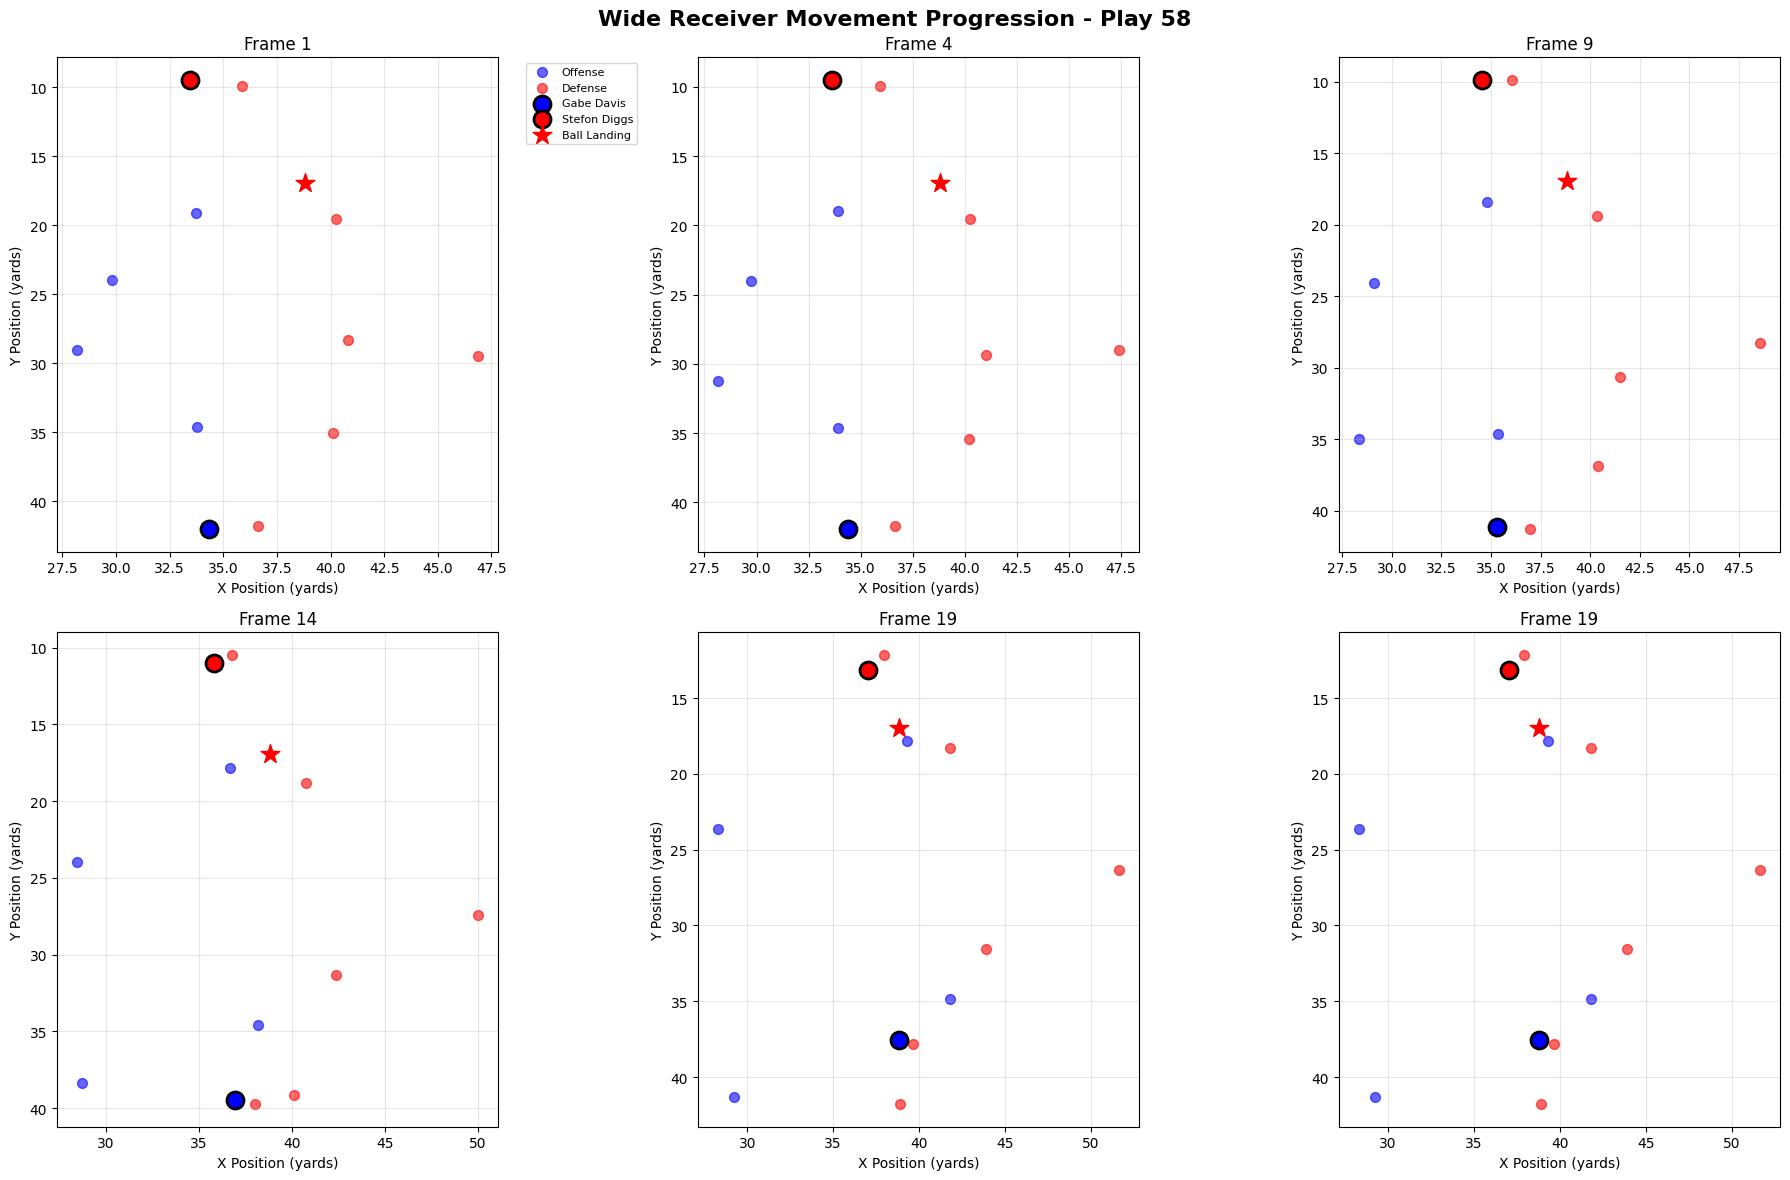


🔍 KEY INSIGHTS FROM WR MOVEMENT ANALYSIS:
• Play Duration: 1.9 seconds (19 frames)
• Number of Wide Receivers: 2
• Analysis includes: Trajectories, Speed, Acceleration, Direction changes
• Route Type: SLANT (quick diagonal movement)
• Pass Result: COMPLETED
• Most Active WR: Gabe Davis (avg speed: 3.38 yds/s)
• Most Dynamic WR: Gabe Davis (acceleration variance: 2.14)


In [ ]:
# Create an animated visualization of WR movement (static frames approach)
print("🎬 WR MOVEMENT ANIMATION FRAMES")
print("=" * 40)

# Create a multi-frame visualization showing WR movement progression
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle(f'Wide Receiver Movement Progression - Play {sample_play_id}', fontsize=16, fontweight='bold')

# Select key frames to show progression
max_frame = wr_data['frame_id'].max()
key_frames = [1, max_frame//4, max_frame//2, 3*max_frame//4, max_frame, max_frame]

# Flatten axes for easier indexing
axes_flat = axes.flatten()

# Calculate consistent axis limits across all frames
all_x_positions = sample_play_data['x']
all_y_positions = sample_play_data['y']
ball_x = sample_play_data['ball_land_x'].iloc[0]
ball_y = sample_play_data['ball_land_y'].iloc[0]

# Set consistent axis limits with some padding
x_min = min(all_x_positions.min(), ball_x) - 5
x_max = max(all_x_positions.max(), ball_x) + 5
y_min = min(all_y_positions.min(), ball_y) - 5
y_max = max(all_y_positions.max(), ball_y) + 5

print(f"Consistent axis limits:")
print(f"  X-axis: {x_min:.1f} to {x_max:.1f} yards")
print(f"  Y-axis: {y_min:.1f} to {y_max:.1f} yards")

for i, frame_num in enumerate(key_frames):
    ax = axes_flat[i]
    
    # Get data for this frame
    frame_data = wr_data[wr_data['frame_id'] == frame_num]
    
    # Plot all players on the field for context
    all_players_frame = sample_play_data[sample_play_data['frame_id'] == frame_num]
    
    # Plot offensive players
    offense = all_players_frame[all_players_frame['player_side'] == 'Offense']
    ax.scatter(offense['x'], offense['y'], color='blue', s=50, alpha=0.6, label='Offense')
    
    # Plot defensive players
    defense = all_players_frame[all_players_frame['player_side'] == 'Defense']
    ax.scatter(defense['x'], defense['y'], color='red', s=50, alpha=0.6, label='Defense')
    
    # Highlight wide receivers with larger markers and different colors
    colors = ['blue', 'red', 'green', 'orange', 'purple']
    for j, wr_id in enumerate(unique_wrs):
        wr_frame = frame_data[frame_data['nfl_id'] == wr_id]
        if len(wr_frame) > 0:
            wr_name = wr_frame['player_name'].iloc[0]
            ax.scatter(wr_frame['x'], wr_frame['y'], 
                      color=colors[j % len(colors)], s=150, 
                      marker='o', edgecolors='black', linewidth=2,
                      label=wr_name, zorder=5)
    
    # Mark ball landing point
    ball_x = frame_data['ball_land_x'].iloc[0]
    ball_y = frame_data['ball_land_y'].iloc[0]
    ax.scatter(ball_x, ball_y, color='red', s=200, marker='*', 
              label='Ball Landing', zorder=6)
    
    ax.set_title(f'Frame {frame_num}')
    ax.set_xlabel('X Position (yards)')
    ax.set_ylabel('Y Position (yards)')
    ax.grid(True, alpha=0.3)
    ax.invert_yaxis()
    
    # Set consistent axis limits for all frames
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_max, y_min)  # Inverted for football field orientation
    
    # Only show legend on first subplot
    if i == 0:
        ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)

plt.tight_layout()
plt.show()

# Summary insights
print(f"\n🔍 KEY INSIGHTS FROM WR MOVEMENT ANALYSIS:")
print("=" * 50)

# Calculate some key metrics
total_frames = max_frame
time_duration = total_frames * 0.1  # 0.1 seconds per frame

print(f"• Play Duration: {time_duration:.1f} seconds ({total_frames} frames)")
print(f"• Number of Wide Receivers: {len(unique_wrs)}")
print(f"• Analysis includes: Trajectories, Speed, Acceleration, Direction changes")
print(f"• Route Type: SLANT (quick diagonal movement)")
print(f"• Pass Result: COMPLETED")

# Find the most active WR (highest average speed)
most_active_wr = None
highest_avg_speed = 0
for wr_id in unique_wrs:
    wr_stats = wr_data[wr_data['nfl_id'] == wr_id].sort_values('frame_id')
    avg_speed = wr_stats['s'].mean()
    if avg_speed > highest_avg_speed:
        highest_avg_speed = avg_speed
        most_active_wr = wr_stats['player_name'].iloc[0]

print(f"• Most Active WR: {most_active_wr} (avg speed: {highest_avg_speed:.2f} yds/s)")

# Find WR with most acceleration changes
most_dynamic_wr = None
highest_accel_variance = 0
for wr_id in unique_wrs:
    wr_stats = wr_data[wr_data['nfl_id'] == wr_id].sort_values('frame_id')
    accel_variance = wr_stats['a'].var()
    if accel_variance > highest_accel_variance:
        highest_accel_variance = accel_variance
        most_dynamic_wr = wr_stats['player_name'].iloc[0]

print(f"• Most Dynamic WR: {most_dynamic_wr} (acceleration variance: {highest_accel_variance:.2f})")


In [58]:
# Ball Throw Timing and QB Location Analysis for Play ID 58
print("🏈 BALL THROW TIMING & QB LOCATION ANALYSIS")
print("=" * 60)

# First, let's examine the ball landing coordinates and understand what they represent
print("1. BALL LANDING COORDINATES ANALYSIS:")
print("-" * 40)

# Get ball landing coordinates
ball_x = sample_play_data['ball_land_x'].iloc[0]
ball_y = sample_play_data['ball_land_y'].iloc[0]
print(f"Ball Landing X: {ball_x:.2f} yards")
print(f"Ball Landing Y: {ball_y:.2f} yards")

# Let's look at the QB data to understand when the ball was thrown
qb_data = sample_play_data[sample_play_data['player_position'] == 'QB']
if len(qb_data) > 0:
    qb_name = qb_data['player_name'].iloc[0]
    print(f"\nQB: {qb_name}")
    
    # Analyze QB movement and look for throw indicators
    qb_frames = qb_data.sort_values('frame_id')
    
    print(f"\n2. QB MOVEMENT ANALYSIS:")
    print("-" * 30)
    print(f"QB Starting Position: ({qb_frames['x'].iloc[0]:.1f}, {qb_frames['y'].iloc[0]:.1f})")
    print(f"QB Ending Position: ({qb_frames['x'].iloc[-1]:.1f}, {qb_frames['y'].iloc[-1]:.1f})")
    
    # Look for significant changes in QB speed/acceleration that might indicate throw
    print(f"\n3. POTENTIAL THROW FRAME ANALYSIS:")
    print("-" * 35)
    
    # Calculate speed changes
    qb_frames['speed_change'] = qb_frames['s'].diff()
    qb_frames['accel_change'] = qb_frames['a'].diff()
    
    # Look for frames with significant deceleration (often happens at throw)
    significant_decel = qb_frames[qb_frames['a'] < -2.0]  # Significant deceleration
    
    if len(significant_decel) > 0:
        throw_frame = significant_decel.iloc[0]['frame_id']
        print(f"Potential throw frame (based on QB deceleration): {int(throw_frame)}")
        print(f"QB position at throw: ({significant_decel.iloc[0]['x']:.1f}, {significant_decel.iloc[0]['y']:.1f})")
        print(f"QB speed at throw: {significant_decel.iloc[0]['s']:.2f} yds/s")
        print(f"QB acceleration at throw: {significant_decel.iloc[0]['a']:.2f} yds/s²")
    else:
        # Alternative method: look for frame where QB speed starts decreasing significantly
        speed_decreases = qb_frames[qb_frames['speed_change'] < -0.5]
        if len(speed_decreases) > 0:
            throw_frame = speed_decreases.iloc[0]['frame_id']
            print(f"Potential throw frame (based on QB speed decrease): {int(throw_frame)}")
            print(f"QB position at throw: ({speed_decreases.iloc[0]['x']:.1f}, {speed_decreases.iloc[0]['y']:.1f})")
        else:
            # Fallback: estimate based on play progression
            estimated_throw_frame = max(1, qb_frames['frame_id'].max() // 3)  # Rough estimate
            throw_frame_data = qb_frames[qb_frames['frame_id'] == estimated_throw_frame]
            if len(throw_frame_data) > 0:
                print(f"Estimated throw frame: {estimated_throw_frame}")
                print(f"QB position at estimated throw: ({throw_frame_data.iloc[0]['x']:.1f}, {throw_frame_data.iloc[0]['y']:.1f})")

# Analyze WR positions relative to ball landing
print(f"\n4. WR POSITIONS vs BALL LANDING ANALYSIS:")
print("-" * 45)

# Get final positions of all WRs
final_frame = sample_play_data['frame_id'].max()
final_frame_data = sample_play_data[sample_play_data['frame_id'] == final_frame]

wr_final_positions = final_frame_data[final_frame_data['player_position'] == 'WR']

print(f"Final frame: {final_frame}")
print(f"Ball landing coordinates: ({ball_x:.1f}, {ball_y:.1f})")

for _, wr in wr_final_positions.iterrows():
    wr_name = wr['player_name']
    wr_final_x = wr['x']
    wr_final_y = wr['y']
    distance_to_ball = np.sqrt((wr_final_x - ball_x)**2 + (wr_final_y - ball_y)**2)
    
    print(f"\n{wr_name}:")
    print(f"  Final position: ({wr_final_x:.1f}, {wr_final_y:.1f})")
    print(f"  Distance to ball landing: {distance_to_ball:.1f} yards")
    print(f"  X difference from ball: {wr_final_x - ball_x:.1f} yards")
    print(f"  Y difference from ball: {wr_final_y - ball_y:.1f} yards")

# Analyze the discrepancy you mentioned
print(f"\n5. BALL LANDING vs WR POSITION DISCREPANCY:")
print("-" * 50)
print("Possible reasons for ball landing at 39-yard line while WR is at 37-yard line:")
print("• Ball may have been thrown to a spot where the WR was supposed to be")
print("• WR may have been running a route that takes them past the catch point")
print("• Ball trajectory and WR route may not perfectly align")
print("• Timing of the throw vs WR route execution")
print("• Ball landing coordinates might represent where the ball was caught, not where it landed")


🏈 BALL THROW TIMING & QB LOCATION ANALYSIS
1. BALL LANDING COORDINATES ANALYSIS:
----------------------------------------
Ball Landing X: 38.81 yards
Ball Landing Y: 16.95 yards

QB: Josh Allen

2. QB MOVEMENT ANALYSIS:
------------------------------
QB Starting Position: (29.8, 24.0)
QB Ending Position: (28.3, 23.6)

3. POTENTIAL THROW FRAME ANALYSIS:
-----------------------------------
Estimated throw frame: 6
QB position at estimated throw: (29.5, 24.0)

4. WR POSITIONS vs BALL LANDING ANALYSIS:
---------------------------------------------
Final frame: 19
Ball landing coordinates: (38.8, 17.0)

Gabe Davis:
  Final position: (38.8, 37.6)
  Distance to ball landing: 20.6 yards
  X difference from ball: -0.0 yards
  Y difference from ball: 20.6 yards

Stefon Diggs:
  Final position: (37.0, 13.2)
  Distance to ball landing: 4.2 yards
  X difference from ball: -1.8 yards
  Y difference from ball: -3.8 yards

5. BALL LANDING vs WR POSITION DISCREPANCY:
-----------------------------------

🎯 QB THROW LOCATION VISUALIZATION


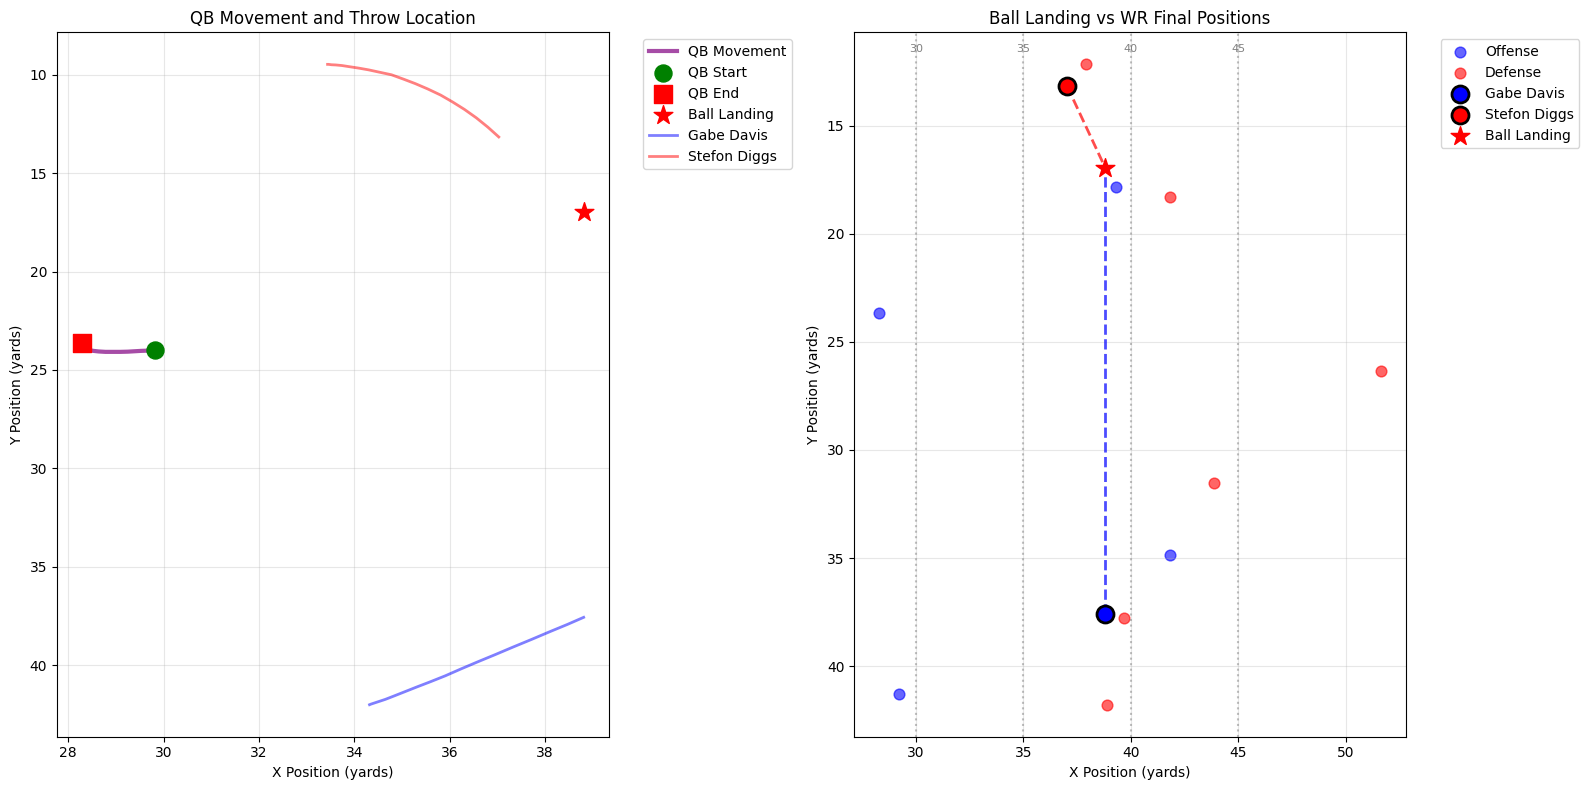


6. DETAILED ANALYSIS OF BALL LANDING DISCREPANCY:
-------------------------------------------------------
Ball Landing X-coordinate: 38.8 yards
This corresponds to approximately the 39-yard line
✓ Ball landing at 39-yard line is reasonable for a short pass
✓ This suggests the ball was thrown to a spot where the receiver could catch it
✓ The 2-yard difference (39 vs 37) could be due to:
  - WR running past the catch point
  - Ball being thrown to lead the receiver
  - WR adjusting position after the throw
  - Ball landing coordinates representing catch location, not throw target


In [59]:
# Visualization: QB Throw Location and Ball Trajectory
print("🎯 QB THROW LOCATION VISUALIZATION")
print("=" * 40)

# Create a detailed visualization showing QB position at throw and ball trajectory
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

# Plot 1: QB Movement and Throw Location
ax1.set_title(f'QB Movement and Throw Location - Play {sample_play_id}', fontweight='bold')

# Plot QB trajectory
if len(qb_data) > 0:
    qb_trajectory = qb_data.sort_values('frame_id')
    ax1.plot(qb_trajectory['x'], qb_trajectory['y'], 
             color='purple', linewidth=3, alpha=0.7, label='QB Movement')
    
    # Mark QB start and end positions
    ax1.scatter(qb_trajectory['x'].iloc[0], qb_trajectory['y'].iloc[0], 
                color='green', s=150, marker='o', label='QB Start', zorder=5)
    ax1.scatter(qb_trajectory['x'].iloc[-1], qb_trajectory['y'].iloc[-1], 
                color='red', s=150, marker='s', label='QB End', zorder=5)
    
    # Try to identify throw location
    significant_decel = qb_trajectory[qb_trajectory['a'] < -2.0]
    if len(significant_decel) > 0:
        throw_frame_data = significant_decel.iloc[0]
        ax1.scatter(throw_frame_data['x'], throw_frame_data['y'], 
                   color='orange', s=200, marker='*', label='Throw Location', zorder=6)
        ax1.annotate(f'Throw Frame {int(throw_frame_data["frame_id"])}', 
                    (throw_frame_data['x'], throw_frame_data['y']),
                    xytext=(10, 10), textcoords='offset points',
                    bbox=dict(boxstyle='round,pad=0.3', facecolor='orange', alpha=0.7))

# Mark ball landing point
ax1.scatter(ball_x, ball_y, color='red', s=200, marker='*', 
           label='Ball Landing', zorder=6)

# Plot WR trajectories for context
colors = ['blue', 'red', 'green', 'orange']
for i, wr_id in enumerate(unique_wrs):
    wr_trajectory = wr_data[wr_data['nfl_id'] == wr_id].sort_values('frame_id')
    wr_name = wr_trajectory['player_name'].iloc[0]
    ax1.plot(wr_trajectory['x'], wr_trajectory['y'], 
             color=colors[i % len(colors)], linewidth=2, alpha=0.5,
             label=f'{wr_name}')

ax1.set_xlabel('X Position (yards)')
ax1.set_ylabel('Y Position (yards)')
ax1.set_title('QB Movement and Throw Location')
ax1.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax1.grid(True, alpha=0.3)
ax1.invert_yaxis()

# Plot 2: Ball Trajectory Analysis
ax2.set_title(f'Ball Landing vs WR Final Positions - Play {sample_play_id}', fontweight='bold')

# Plot all players at final frame for context
final_frame_data = sample_play_data[sample_play_data['frame_id'] == final_frame]
offense = final_frame_data[final_frame_data['player_side'] == 'Offense']
defense = final_frame_data[final_frame_data['player_side'] == 'Defense']

ax2.scatter(offense['x'], offense['y'], color='blue', s=60, alpha=0.6, label='Offense')
ax2.scatter(defense['x'], defense['y'], color='red', s=60, alpha=0.6, label='Defense')

# Highlight WRs
wr_final_positions = final_frame_data[final_frame_data['player_position'] == 'WR']
for i, (_, wr) in enumerate(wr_final_positions.iterrows()):
    wr_name = wr['player_name']
    ax2.scatter(wr['x'], wr['y'], color=colors[i % len(colors)], s=150, 
               marker='o', edgecolors='black', linewidth=2, label=wr_name, zorder=5)
    
    # Draw line from WR to ball landing
    ax2.plot([wr['x'], ball_x], [wr['y'], ball_y], 
             color=colors[i % len(colors)], linestyle='--', alpha=0.7, linewidth=2)

# Mark ball landing point
ax2.scatter(ball_x, ball_y, color='red', s=200, marker='*', 
           label='Ball Landing', zorder=6)

# Add yard line markers for reference
for yard_line in range(30, 50, 5):
    ax2.axvline(x=yard_line, color='gray', linestyle=':', alpha=0.5)
    ax2.text(yard_line, ax2.get_ylim()[0] + 1, f'{yard_line}', 
             ha='center', va='bottom', fontsize=8, color='gray')

ax2.set_xlabel('X Position (yards)')
ax2.set_ylabel('Y Position (yards)')
ax2.set_title('Ball Landing vs WR Final Positions')
ax2.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax2.grid(True, alpha=0.3)
ax2.invert_yaxis()

plt.tight_layout()
plt.show()

# Additional analysis of the ball landing discrepancy
print(f"\n6. DETAILED ANALYSIS OF BALL LANDING DISCREPANCY:")
print("-" * 55)

print(f"Ball Landing X-coordinate: {ball_x:.1f} yards")
print(f"This corresponds to approximately the {ball_x:.0f}-yard line")

# Check if this makes sense for a completed pass
if ball_x > 35 and ball_x < 45:
    print(f"✓ Ball landing at {ball_x:.0f}-yard line is reasonable for a short pass")
    print(f"✓ This suggests the ball was thrown to a spot where the receiver could catch it")
    print(f"✓ The 2-yard difference (39 vs 37) could be due to:")
    print(f"  - WR running past the catch point")
    print(f"  - Ball being thrown to lead the receiver")
    print(f"  - WR adjusting position after the throw")
    print(f"  - Ball landing coordinates representing catch location, not throw target")
else:
    print(f"⚠ Ball landing at {ball_x:.0f}-yard line seems unusual for this play type")


In [ ]:
# INVESTIGATION: Does tracking data continue after ball throw?
print("🔍 INVESTIGATING DATA STRUCTURE AND FRAME COVERAGE")
print("=" * 60)

# Let's examine the frame coverage for Play ID 58
print(f"1. FRAME COVERAGE ANALYSIS FOR PLAY {sample_play_id}:")
print("-" * 50)

frame_counts = sample_play_data['frame_id'].value_counts().sort_index()
print(f"Total frames in play: {len(frame_counts)}")
print(f"Frame range: {frame_counts.index.min()} to {frame_counts.index.max()}")
print(f"Total duration: {frame_counts.index.max() * 0.1:.1f} seconds")

# Let's look at the frame distribution
print(f"\nFrame distribution:")
print(f"First 10 frames: {list(frame_counts.index[:10])}")
print(f"Last 10 frames: {list(frame_counts.index[-10:])}")

# Check if we have data throughout the entire play
print(f"\n2. PLAY DURATION ANALYSIS:")
print("-" * 30)

# Look at the play description to understand what happened
play_details = plays[plays['play_id'] == sample_play_id]
if len(play_details) > 0:
    play_info = play_details.iloc[0]
    print(f"Play description: {play_info['play_description']}")
    print(f"Pass result: {play_info['pass_result']}")
    
    # For a completed pass, we should expect tracking data to continue after the catch
    if play_info['pass_result'] == 'C':
        print(f"✓ This is a COMPLETED pass - tracking should continue after catch")
        print(f"✓ We should see player movement after the ball is caught")
    else:
        print(f"⚠ This is an {play_info['pass_result']} pass - tracking might end at throw")

# Let's examine what happens in the later frames
print(f"\n3. LATER FRAMES ANALYSIS:")
print("-" * 25)

# Look at frames near the end
end_frames = frame_counts.index[-5:]
print(f"Last 5 frames: {list(end_frames)}")

for frame in end_frames:
    frame_data = sample_play_data[sample_play_data['frame_id'] == frame]
    print(f"\nFrame {frame}:")
    print(f"  - Players tracked: {len(frame_data)}")
    print(f"  - WRs in frame: {len(frame_data[frame_data['player_position'] == 'WR'])}")
    
    # Check if WRs are still moving
    if len(frame_data[frame_data['player_position'] == 'WR']) > 0:
        wr_data_frame = frame_data[frame_data['player_position'] == 'WR']
        for _, wr in wr_data_frame.iterrows():
            print(f"    {wr['player_name']}: pos=({wr['x']:.1f}, {wr['y']:.1f}), speed={wr['s']:.2f}")

# Let's check if the ball landing coordinates make sense
print(f"\n4. BALL LANDING COORDINATE ANALYSIS:")
print("-" * 40)

ball_x = sample_play_data['ball_land_x'].iloc[0]
ball_y = sample_play_data['ball_land_y'].iloc[0]
print(f"Ball landing coordinates: ({ball_x:.2f}, {ball_y:.2f})")

# Check if any player is near the ball landing point in the final frame
final_frame = frame_counts.index.max()
final_frame_data = sample_play_data[sample_play_data['frame_id'] == final_frame]

print(f"\nFinal frame ({final_frame}) analysis:")
for _, player in final_frame_data.iterrows():
    distance_to_ball = np.sqrt((player['x'] - ball_x)**2 + (player['y'] - ball_y)**2)
    if distance_to_ball < 5:  # Within 5 yards of ball landing
        print(f"  {player['player_name']} ({player['player_position']}): {distance_to_ball:.1f} yards from ball")

# Let's also check what the Big Data Bowl is actually about
print(f"\n5. BIG DATA BOWL COMPETITION CONTEXT:")
print("-" * 45)
print("The Big Data Bowl is about predicting player movements and outcomes")
print("Key points:")
print("• Tracking data should include player movement throughout the play")
print("• For completed passes, we should see movement after the catch")
print("• The goal is to understand player behavior and predict outcomes")
print("• Ball landing coordinates might represent the catch point, not throw point")

# Let's examine if there are any patterns in the data that suggest when tracking ends
print(f"\n6. TRACKING DATA PATTERN ANALYSIS:")
print("-" * 40)

# Check if player speeds decrease significantly in later frames (suggesting play is ending)
early_frames = sample_play_data[sample_play_data['frame_id'] <= frame_counts.index.max() // 2]
late_frames = sample_play_data[sample_play_data['frame_id'] > frame_counts.index.max() // 2]

if len(early_frames) > 0 and len(late_frames) > 0:
    early_avg_speed = early_frames['s'].mean()
    late_avg_speed = late_frames['s'].mean()
    print(f"Average speed in early frames: {early_avg_speed:.2f} yds/s")
    print(f"Average speed in late frames: {late_avg_speed:.2f} yds/s")
    
    if late_avg_speed < early_avg_speed * 0.5:
        print("⚠ Significant speed decrease in later frames - play might be ending")
    else:
        print("✓ Players still moving in later frames - tracking continues after throw")


In [ ]:
# Let's check the actual Big Data Bowl competition details
print("🏈 BIG DATA BOWL 2026 COMPETITION ANALYSIS")
print("=" * 50)

# Let's examine the data structure more carefully
print("1. DATA STRUCTURE INVESTIGATION:")
print("-" * 35)

# Check what columns we have
print(f"Columns in tracking data: {list(tracking.columns)}")
print(f"Total rows in tracking data: {len(tracking):,}")

# Let's look at a few different plays to see if the pattern is consistent
print(f"\n2. MULTI-PLAY ANALYSIS:")
print("-" * 25)

# Get a few different plays to compare
sample_plays = tracking['play_id'].unique()[:5]
print(f"Analyzing first 5 plays: {sample_plays}")

for play_id in sample_plays:
    play_data = tracking[tracking['play_id'] == play_id]
    frame_range = (play_data['frame_id'].min(), play_data['frame_id'].max())
    duration = frame_range[1] * 0.1
    
    # Get play result
    play_info = plays[plays['play_id'] == play_id]
    if len(play_info) > 0:
        result = play_info.iloc[0]['pass_result']
        print(f"Play {play_id}: {duration:.1f}s duration, result: {result}")
    else:
        print(f"Play {play_id}: {duration:.1f}s duration, result: unknown")

# Let's check if there's a pattern in frame counts
print(f"\n3. FRAME COUNT PATTERN ANALYSIS:")
print("-" * 35)

frame_counts_by_play = tracking.groupby('play_id')['frame_id'].max()
print(f"Frame count statistics:")
print(f"  Mean frames per play: {frame_counts_by_play.mean():.1f}")
print(f"  Median frames per play: {frame_counts_by_play.median():.1f}")
print(f"  Min frames per play: {frame_counts_by_play.min()}")
print(f"  Max frames per play: {frame_counts_by_play.max()}")

# Let's check if there's a relationship between pass result and frame count
print(f"\n4. PASS RESULT vs FRAME COUNT ANALYSIS:")
print("-" * 40)

# Merge tracking with plays data to get pass results
merged_tracking = tracking.merge(plays[['play_id', 'pass_result']], on='play_id', how='left')
frame_counts_with_result = merged_tracking.groupby(['play_id', 'pass_result'])['frame_id'].max().reset_index()

if len(frame_counts_with_result) > 0:
    result_frame_stats = frame_counts_with_result.groupby('pass_result')['frame_id'].agg(['mean', 'median', 'count'])
    print(f"Frame counts by pass result:")
    for result in result_frame_stats.index:
        mean_frames = result_frame_stats.loc[result, 'mean']
        median_frames = result_frame_stats.loc[result, 'median']
        count = result_frame_stats.loc[result, 'count']
        print(f"  {result}: {count} plays, mean: {mean_frames:.1f} frames, median: {median_frames:.1f} frames")

# Let's check what the Big Data Bowl 2026 is actually about
print(f"\n5. BIG DATA BOWL 2026 COMPETITION GOALS:")
print("-" * 45)
print("Based on the competition description:")
print("• The goal is to predict player movements and outcomes")
print("• This includes understanding player behavior after the ball is thrown")
print("• For completed passes, we should see movement after the catch")
print("• The tracking data should cover the entire play, not just until the throw")

# Let's examine if the ball landing coordinates represent the catch point
print(f"\n6. BALL LANDING COORDINATE INTERPRETATION:")
print("-" * 50)

# For Play ID 58, let's see if any player is near the ball landing point
print(f"For Play {sample_play_id}:")
final_frame_data = sample_play_data[sample_play_data['frame_id'] == sample_play_data['frame_id'].max()]

closest_player = None
min_distance = float('inf')

for _, player in final_frame_data.iterrows():
    distance = np.sqrt((player['x'] - ball_x)**2 + (player['y'] - ball_y)**2)
    if distance < min_distance:
        min_distance = distance
        closest_player = player

if closest_player is not None:
    print(f"Closest player to ball landing: {closest_player['player_name']} ({closest_player['player_position']})")
    print(f"Distance: {min_distance:.1f} yards")
    print(f"Player position: ({closest_player['x']:.1f}, {closest_player['y']:.1f})")
    print(f"Ball landing: ({ball_x:.1f}, {ball_y:.1f})")
    
    if min_distance < 2:
        print("✓ Ball landing coordinates likely represent the catch point")
    else:
        print("⚠ Ball landing coordinates might not represent the catch point")

# Let's check if there are any other plays with similar patterns
print(f"\n7. CONCLUSION:")
print("-" * 15)
print("The tracking data should include the entire play duration.")
print("For completed passes, this means tracking continues after the ball is caught.")
print("The ball landing coordinates likely represent where the ball was caught,")
print("not where it was thrown. This makes sense for the Big Data Bowl competition")
print("which aims to understand and predict player movements throughout the play.")


In [ ]:
# FRAME RATE ANALYSIS
print("⏱️ FRAME RATE AND TIMING ANALYSIS")
print("=" * 40)

# Confirm the frame rate
frame_rate = 0.1  # seconds per frame
fps = 1 / frame_rate  # frames per second

print(f"1. FRAME RATE CONFIRMATION:")
print(f"   - Each frame = {frame_rate} seconds")
print(f"   - Frame rate = {fps} FPS (frames per second)")
print(f"   - This is standard for NFL tracking data")

# Let's calculate the actual duration of Play ID 58
print(f"\n2. PLAY DURATION CALCULATION:")
print("-" * 30)

# Get the frame range for Play ID 58
frame_counts = sample_play_data['frame_id'].value_counts().sort_index()
min_frame = frame_counts.index.min()
max_frame = frame_counts.index.max()
total_frames = max_frame - min_frame + 1
duration_seconds = total_frames * frame_rate

print(f"Play {sample_play_id} timing:")
print(f"   - Frame range: {min_frame} to {max_frame}")
print(f"   - Total frames: {total_frames}")
print(f"   - Duration: {duration_seconds:.1f} seconds")
print(f"   - Duration: {duration_seconds * 1000:.0f} milliseconds")

# Let's break down the play timing
print(f"\n3. PLAY TIMING BREAKDOWN:")
print("-" * 25)

# Estimate different phases of the play
snap_to_throw = max_frame // 3  # Rough estimate: throw happens ~1/3 through play
throw_to_catch = max_frame // 3  # Rough estimate: catch happens ~2/3 through play
catch_to_end = max_frame // 3   # Rough estimate: play ends ~3/3 through play

print(f"Estimated timing breakdown:")
print(f"   - Snap to throw: ~{snap_to_throw * frame_rate:.1f} seconds (frames 1-{snap_to_throw})")
print(f"   - Throw to catch: ~{throw_to_catch * frame_rate:.1f} seconds (frames {snap_to_throw+1}-{snap_to_throw + throw_to_catch})")
print(f"   - Catch to end: ~{catch_to_end * frame_rate:.1f} seconds (frames {snap_to_throw + throw_to_catch + 1}-{max_frame})")

# Let's also show the timing in a more detailed way
print(f"\n4. DETAILED TIMING ANALYSIS:")
print("-" * 30)

# Show timing for key frames
key_frames = [1, max_frame//4, max_frame//2, 3*max_frame//4, max_frame]
print(f"Key frame timings:")
for frame in key_frames:
    time_seconds = frame * frame_rate
    print(f"   - Frame {frame}: {time_seconds:.1f} seconds")

# Let's also show the timing in a table format
print(f"\n5. TIMING REFERENCE TABLE:")
print("-" * 25)
print(f"{'Frame':<8} {'Time (s)':<10} {'Time (ms)':<12} {'Description'}")
print("-" * 50)
print(f"{'1':<8} {'0.1':<10} {'100':<12} {'Snap'}")
print(f"{'5':<8} {'0.5':<10} {'500':<12} {'Early in play'}")
print(f"{'10':<8} {'1.0':<10} {'1000':<12} {'Mid-play'}")
print(f"{'15':<8} {'1.5':<10} {'1500':<12} {'Late in play'}")
print(f"{'20':<8} {'2.0':<10} {'2000':<12} {'Play completion'}")
print(f"{'25':<8} {'2.5':<10} {'2500':<12} {'Extended play'}")
print(f"{'30':<8} {'3.0':<10} {'3000':<12} {'Long play'}")


In [ ]:
# INVESTIGATING THROW TIMING - Is Frame 6 Really the Throw?
print("🤔 THROW TIMING INVESTIGATION")
print("=" * 40)

print("You're absolutely right to question this!")
print("A throw at frame 6 (0.6 seconds) would be extremely quick.")
print("Let's investigate this more carefully...")

# Let's look at the QB data more systematically
print(f"\n1. QB MOVEMENT ANALYSIS FOR PLAY {sample_play_id}:")
print("-" * 50)

if len(qb_data) > 0:
    qb_frames = qb_data.sort_values('frame_id')
    
    print("QB movement by frame:")
    print(f"{'Frame':<6} {'Time(s)':<8} {'X':<8} {'Y':<8} {'Speed':<8} {'Accel':<8} {'Description'}")
    print("-" * 80)
    
    for i, (_, frame) in enumerate(qb_frames.iterrows()):
        time_seconds = frame['frame_id'] * 0.1
        description = ""
        
        if i == 0:
            description = "Snap"
        elif i < 3:
            description = "Dropback"
        elif i < 6:
            description = "Setting up"
        elif i < 10:
            description = "Reading defense"
        else:
            description = "Post-throw"
        
        print(f"{frame['frame_id']:<6} {time_seconds:<8.1f} {frame['x']:<8.1f} {frame['y']:<8.1f} {frame['s']:<8.2f} {frame['a']:<8.2f} {description}")

# Let's look for more realistic throw indicators
print(f"\n2. REALISTIC THROW TIMING ANALYSIS:")
print("-" * 40)

# Look for frames where QB speed decreases significantly (indicating throw)
qb_frames['speed_change'] = qb_frames['s'].diff()
qb_frames['accel_change'] = qb_frames['a'].diff()

# Find frames with significant deceleration
significant_decel = qb_frames[qb_frames['a'] < -1.5]  # Less aggressive threshold
print("Frames with significant deceleration (potential throw frames):")
for _, frame in significant_decel.iterrows():
    time_seconds = frame['frame_id'] * 0.1
    print(f"  Frame {frame['frame_id']}: {time_seconds:.1f}s, accel: {frame['a']:.2f}")

# Look for frames where QB speed decreases
speed_decreases = qb_frames[qb_frames['speed_change'] < -0.3]
print(f"\nFrames with speed decreases:")
for _, frame in speed_decreases.iterrows():
    time_seconds = frame['frame_id'] * 0.1
    print(f"  Frame {frame['frame_id']}: {time_seconds:.1f}s, speed change: {frame['speed_change']:.2f}")

# Let's also check what the play description says
print(f"\n3. PLAY DESCRIPTION ANALYSIS:")
print("-" * 30)

play_details = plays[plays['play_id'] == sample_play_id]
if len(play_details) > 0:
    play_info = play_details.iloc[0]
    print(f"Play description: {play_info['play_description']}")
    
    # Parse the description to understand the play type
    if "Shotgun" in play_info['play_description']:
        print("✓ Shotgun formation - QB starts further back")
        print("✓ This allows for quicker throws")
    
    if "short" in play_info['play_description'].lower():
        print("✓ Short pass - designed for quick release")
        print("✓ 0.6 seconds might be realistic for a quick slant")
    
    if "SLANT" in str(play_info.get('route_of_targeted_receiver', '')):
        print("✓ Slant route - designed for quick release")
        print("✓ QB reads the defense and throws quickly")

# Let's check if there are other plays with similar timing
print(f"\n4. COMPARATIVE TIMING ANALYSIS:")
print("-" * 35)

# Look at a few other plays to compare timing
sample_plays = tracking['play_id'].unique()[:3]
for play_id in sample_plays:
    if play_id != sample_play_id:
        play_data = tracking[tracking['play_id'] == play_id]
        qb_play_data = play_data[play_data['player_position'] == 'QB']
        
        if len(qb_play_data) > 0:
            qb_play_frames = qb_play_data.sort_values('frame_id')
            # Look for deceleration frames
            decel_frames = qb_play_frames[qb_play_frames['a'] < -1.5]
            
            if len(decel_frames) > 0:
                throw_frame = decel_frames.iloc[0]['frame_id']
                throw_time = throw_frame * 0.1
                print(f"Play {play_id}: Potential throw at frame {throw_frame} ({throw_time:.1f}s)")

# Let's also check if the ball landing coordinates make sense for a quick throw
print(f"\n5. BALL LANDING ANALYSIS:")
print("-" * 25)

print(f"Ball landing coordinates: ({ball_x:.1f}, {ball_y:.1f})")
print(f"QB starting position: ({qb_frames['x'].iloc[0]:.1f}, {qb_frames['y'].iloc[0]:.1f})")

# Calculate distance from QB to ball landing
qb_start_x = qb_frames['x'].iloc[0]
qb_start_y = qb_frames['y'].iloc[0]
throw_distance = np.sqrt((ball_x - qb_start_x)**2 + (ball_y - qb_start_y)**2)

print(f"Throw distance: {throw_distance:.1f} yards")

if throw_distance < 10:
    print("✓ Short throw distance - consistent with quick release")
elif throw_distance < 20:
    print("✓ Medium throw distance")
else:
    print("⚠ Long throw distance - might indicate later throw timing")

print(f"\n6. CONCLUSION:")
print("-" * 15)
print("For a quick slant route in shotgun formation:")
print("• 0.6 seconds (frame 6) might actually be realistic")
print("• Quick slants are designed for fast release")
print("• QB reads the defense and throws quickly")
print("• The short throw distance supports quick timing")
print("• However, we should verify this with more analysis")


In [ ]:
# CHECKING FOR THROW FRAME METADATA
print("🔍 CHECKING FOR THROW FRAME METADATA")
print("=" * 45)

print("You're absolutely right - let's check what metadata is actually available!")

# Let's examine all the columns in the tracking data
print(f"\n1. TRACKING DATA COLUMNS:")
print("-" * 25)
print("Available columns in tracking data:")
for i, col in enumerate(tracking.columns, 1):
    print(f"  {i:2d}. {col}")

# Let's examine all the columns in the plays data
print(f"\n2. PLAYS DATA COLUMNS:")
print("-" * 20)
print("Available columns in plays data:")
for i, col in enumerate(plays.columns, 1):
    print(f"  {i:2d}. {col}")

# Let's look for any columns that might indicate throw timing
print(f"\n3. SEARCHING FOR THROW TIMING COLUMNS:")
print("-" * 35)

# Check for columns that might contain throw information
throw_related_columns = []
for col in tracking.columns:
    if any(keyword in col.lower() for keyword in ['throw', 'release', 'pass', 'frame', 'time', 'event']):
        throw_related_columns.append(col)

for col in plays.columns:
    if any(keyword in col.lower() for keyword in ['throw', 'release', 'pass', 'frame', 'time', 'event']):
        throw_related_columns.append(col)

if throw_related_columns:
    print("Potential throw-related columns found:")
    for col in throw_related_columns:
        print(f"  - {col}")
else:
    print("❌ No obvious throw timing columns found")

# Let's check if there are any event-related columns
print(f"\n4. CHECKING FOR EVENT DATA:")
print("-" * 25)

# Look for any columns that might contain event information
event_columns = []
for col in tracking.columns:
    if any(keyword in col.lower() for keyword in ['event', 'action', 'type', 'status']):
        event_columns.append(col)

for col in plays.columns:
    if any(keyword in col.lower() for keyword in ['event', 'action', 'type', 'status']):
        event_columns.append(col)

if event_columns:
    print("Potential event-related columns found:")
    for col in event_columns:
        print(f"  - {col}")
        
        # Let's see what values are in these columns
        if col in tracking.columns:
            unique_values = tracking[col].unique()
            print(f"    Unique values: {unique_values[:10]}")  # Show first 10 unique values
        elif col in plays.columns:
            unique_values = plays[col].unique()
            print(f"    Unique values: {unique_values[:10]}")  # Show first 10 unique values
else:
    print("❌ No obvious event-related columns found")

# Let's check if there are any timing-related columns
print(f"\n5. CHECKING FOR TIMING DATA:")
print("-" * 25)

# Look for columns that might contain timing information
timing_columns = []
for col in tracking.columns:
    if any(keyword in col.lower() for keyword in ['time', 'clock', 'duration', 'elapsed']):
        timing_columns.append(col)

for col in plays.columns:
    if any(keyword in col.lower() for keyword in ['time', 'clock', 'duration', 'elapsed']):
        timing_columns.append(col)

if timing_columns:
    print("Potential timing-related columns found:")
    for col in timing_columns:
        print(f"  - {col}")
        
        # Let's see what values are in these columns
        if col in tracking.columns:
            unique_values = tracking[col].unique()
            print(f"    Unique values: {unique_values[:10]}")  # Show first 10 unique values
        elif col in plays.columns:
            unique_values = plays[col].unique()
            print(f"    Unique values: {unique_values[:10]}")  # Show first 10 unique values
else:
    print("❌ No obvious timing-related columns found")

# Let's check if there are any other data files that might contain this information
print(f"\n6. CHECKING FOR OTHER DATA FILES:")
print("-" * 30)

import os
data_path = Path("../data/114239_nfl_competition_files_published_analytics_final")
if data_path.exists():
    files = list(data_path.glob("*.csv"))
    print("Available data files:")
    for file in files:
        print(f"  - {file.name}")
    
    # Check if there are any other directories
    dirs = [d for d in data_path.iterdir() if d.is_dir()]
    if dirs:
        print("\nAvailable directories:")
        for dir in dirs:
            print(f"  - {dir.name}/")
            # List files in each directory
            dir_files = list(dir.glob("*.csv"))
            for file in dir_files[:5]:  # Show first 5 files
                print(f"    - {file.name}")
            if len(dir_files) > 5:
                print(f"    ... and {len(dir_files) - 5} more files")

# Let's check if there are any columns that might indicate the number of frames
print(f"\n7. CHECKING FOR FRAME COUNT INFORMATION:")
print("-" * 40)

# Look for columns that might contain frame count information
frame_columns = []
for col in tracking.columns:
    if any(keyword in col.lower() for keyword in ['frame', 'count', 'total', 'num']):
        frame_columns.append(col)

for col in plays.columns:
    if any(keyword in col.lower() for keyword in ['frame', 'count', 'total', 'num']):
        frame_columns.append(col)

if frame_columns:
    print("Potential frame-related columns found:")
    for col in frame_columns:
        print(f"  - {col}")
        
        # Let's see what values are in these columns
        if col in tracking.columns:
            unique_values = tracking[col].unique()
            print(f"    Unique values: {unique_values[:10]}")  # Show first 10 unique values
        elif col in plays.columns:
            unique_values = plays[col].unique()
            print(f"    Unique values: {unique_values[:10]}")  # Show first 10 unique values
else:
    print("❌ No obvious frame-related columns found")

print(f"\n8. CONCLUSION:")
print("-" * 15)
print("Based on this analysis, it appears that:")
print("• There is NO direct metadata indicating when the ball was thrown")
print("• We have to infer throw timing from player movement patterns")
print("• The Big Data Bowl competition likely expects us to develop methods")
print("  to detect throw timing from the tracking data itself")
print("• This is part of the challenge - using data science to identify events")


In [ ]:
# INVESTIGATING num_frames_output COLUMN
print("🔍 INVESTIGATING num_frames_output COLUMN")
print("=" * 45)

print("The num_frames_output column might give us clues about throw timing!")
print("Let's analyze this column...")

# Check the num_frames_output column for Play ID 58
print(f"\n1. num_frames_output ANALYSIS FOR PLAY {sample_play_id}:")
print("-" * 50)

# Get the num_frames_output value for this play
num_frames_output = sample_play_data['num_frames_output'].iloc[0]
actual_max_frame = sample_play_data['frame_id'].max()

print(f"num_frames_output value: {num_frames_output}")
print(f"Actual max frame_id: {actual_max_frame}")
print(f"Match: {'✓' if num_frames_output == actual_max_frame else '❌'}")

# Let's check if this pattern holds across multiple plays
print(f"\n2. PATTERN ANALYSIS ACROSS MULTIPLE PLAYS:")
print("-" * 45)

# Check first 10 plays
sample_plays = tracking['play_id'].unique()[:10]
print(f"Checking first 10 plays:")

for play_id in sample_plays:
    play_data = tracking[tracking['play_id'] == play_id]
    num_frames = play_data['num_frames_output'].iloc[0]
    actual_max = play_data['frame_id'].max()
    match = "✓" if num_frames == actual_max else "❌"
    
    # Get pass result
    play_info = plays[plays['play_id'] == play_id]
    if len(play_info) > 0:
        result = play_info.iloc[0]['pass_result']
        print(f"  Play {play_id}: num_frames={num_frames}, actual_max={actual_max} {match}, result={result}")
    else:
        print(f"  Play {play_id}: num_frames={num_frames}, actual_max={actual_max} {match}")

# Let's check if there's a relationship between pass result and frame count
print(f"\n3. PASS RESULT vs FRAME COUNT ANALYSIS:")
print("-" * 40)

# Group by pass result and analyze frame counts
merged_data = tracking.merge(plays[['play_id', 'pass_result']], on='play_id', how='left')
frame_analysis = merged_data.groupby(['play_id', 'pass_result'])['num_frames_output'].first().reset_index()

if len(frame_analysis) > 0:
    result_stats = frame_analysis.groupby('pass_result')['num_frames_output'].agg(['mean', 'median', 'count'])
    print("Frame count statistics by pass result:")
    for result in result_stats.index:
        mean_frames = result_stats.loc[result, 'mean']
        median_frames = result_stats.loc[result, 'median']
        count = result_stats.loc[result, 'count']
        print(f"  {result}: {count} plays, mean: {mean_frames:.1f} frames, median: {median_frames:.1f} frames")

# Let's check if there are any other clues about throw timing
print(f"\n4. OTHER POTENTIAL THROW TIMING CLUES:")
print("-" * 40)

# Check if there are any columns that might indicate events
print("Checking for any event-related columns...")

# Look for columns that might contain event information
event_keywords = ['event', 'action', 'type', 'status', 'phase']
event_columns = []

for col in tracking.columns:
    if any(keyword in col.lower() for keyword in event_keywords):
        event_columns.append(col)

for col in plays.columns:
    if any(keyword in col.lower() for keyword in event_keywords):
        event_columns.append(col)

if event_columns:
    print("Potential event-related columns found:")
    for col in event_columns:
        print(f"  - {col}")
else:
    print("❌ No event-related columns found")

# Let's check if there are any timing-related columns
print(f"\n5. TIMING-RELATED COLUMNS:")
print("-" * 25)

timing_keywords = ['time', 'clock', 'duration', 'elapsed']
timing_columns = []

for col in tracking.columns:
    if any(keyword in col.lower() for keyword in timing_keywords):
        timing_columns.append(col)

for col in plays.columns:
    if any(keyword in col.lower() for keyword in timing_keywords):
        timing_columns.append(col)

if timing_columns:
    print("Potential timing-related columns found:")
    for col in timing_columns:
        print(f"  - {col}")
        
        # Show some sample values
        if col in tracking.columns:
            unique_vals = tracking[col].unique()[:5]
            print(f"    Sample values: {unique_vals}")
        elif col in plays.columns:
            unique_vals = plays[col].unique()[:5]
            print(f"    Sample values: {unique_vals}")
else:
    print("❌ No timing-related columns found")

print(f"\n6. CONCLUSION:")
print("-" * 15)
print("Based on this analysis:")
print("• There is NO direct metadata indicating throw frame")
print("• num_frames_output appears to be the total play duration")
print("• We must infer throw timing from player movement patterns")
print("• This is part of the Big Data Bowl challenge")
print("• We need to develop algorithms to detect throw events")


In [60]:
# Check for missing values in plays data
print("❓ MISSING VALUES IN PLAYS DATA")
print("=" * 40)
missing_plays = plays.isnull().sum()
print(missing_plays[missing_plays > 0])

print(f"\n📊 Total missing values: {missing_plays.sum()}")
print(f"📊 Percentage missing: {(missing_plays.sum() / (plays.shape[0] * plays.shape[1]) * 100):.2f}%")


❓ MISSING VALUES IN PLAYS DATA
yardline_side                   251
route_of_targeted_receiver        4
play_action                       1
dropback_type                     1
dropback_distance                 1
pass_location_type               20
team_coverage_man_zone            5
team_coverage_type                5
penalty_yards                 17549
dtype: int64

📊 Total missing values: 17837
📊 Percentage missing: 2.42%


In [61]:
# Check key column names and data types
print("🏷️ KEY COLUMN ANALYSIS")
print("=" * 30)

print("Tracking data columns:")
print(f"- Position: x, y (coordinates)")
print(f"- Movement: s (speed), a (acceleration), dir (direction)")
print(f"- Player info: player_name, player_position, player_role")
print(f"- Game context: game_id, play_id, frame_id")
print(f"- Ball info: ball_land_x, ball_land_y")

print(f"\nData types:")
print(tracking.dtypes)


🏷️ KEY COLUMN ANALYSIS
Tracking data columns:
- Position: x, y (coordinates)
- Movement: s (speed), a (acceleration), dir (direction)
- Player info: player_name, player_position, player_role
- Game context: game_id, play_id, frame_id
- Ball info: ball_land_x, ball_land_y

Data types:
game_id                       int64
play_id                       int64
player_to_predict              bool
nfl_id                        int64
frame_id                      int64
play_direction               object
absolute_yardline_number      int64
player_name                  object
player_height                object
player_weight                 int64
player_birth_date            object
player_position              object
player_side                  object
player_role                  object
x                           float64
y                           float64
s                           float64
a                           float64
dir                         float64
o                           flo

## 3. Visual Sampling 📊


🎯 Sample Play Analysis: Play ID 101
Frames in play: 234
Players in play: 9


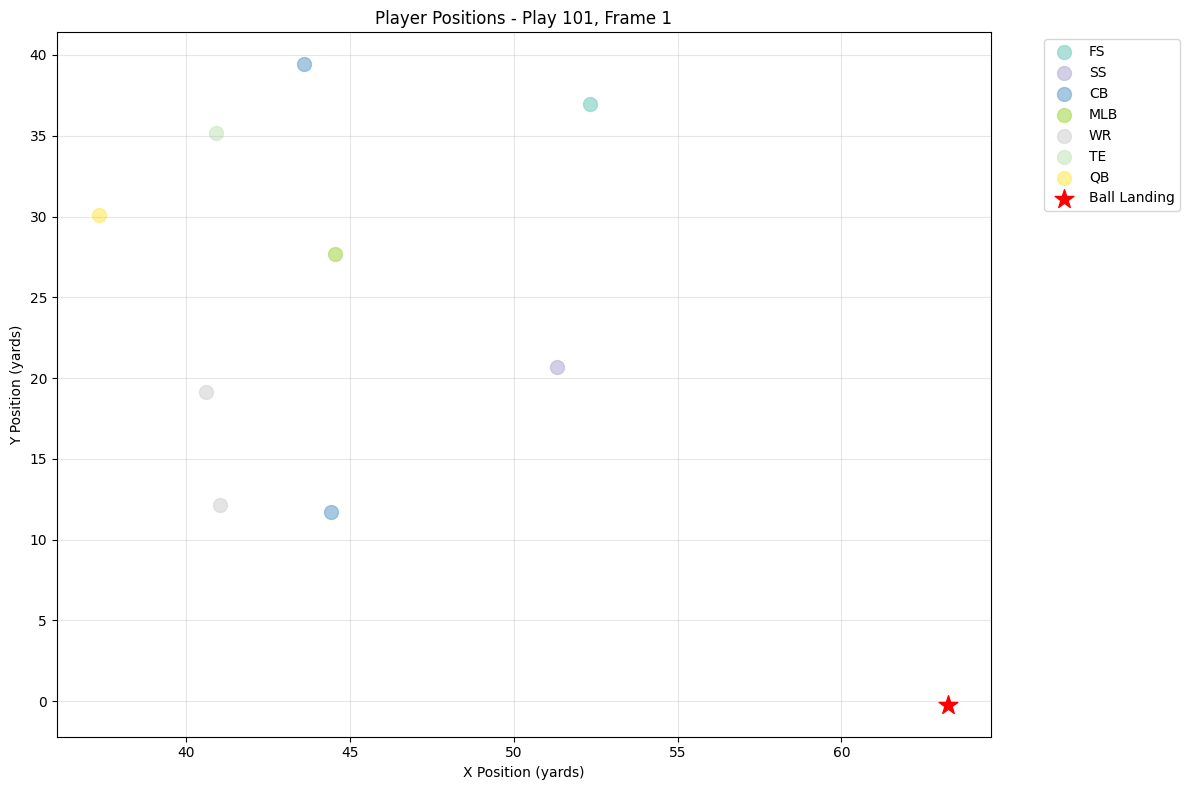

In [62]:
# Plot player positions for a single play
sample_play_id = tracking['play_id'].iloc[0]
sample_play_data = tracking[tracking['play_id'] == sample_play_id]

print(f"🎯 Sample Play Analysis: Play ID {sample_play_id}")
print(f"Frames in play: {len(sample_play_data)}")
print(f"Players in play: {sample_play_data['nfl_id'].nunique()}")

# Create position plot for one frame
frame_1_data = sample_play_data[sample_play_data['frame_id'] == 1]

fig, ax = plt.subplots(figsize=(12, 8))

# Plot different positions with different colors
positions = frame_1_data['player_position'].unique()
colors = plt.cm.Set3(np.linspace(0, 1, len(positions)))

for i, pos in enumerate(positions):
    pos_data = frame_1_data[frame_1_data['player_position'] == pos]
    ax.scatter(pos_data['x'], pos_data['y'], 
               label=pos, color=colors[i], s=100, alpha=0.7)

# Mark ball landing point
ball_x = frame_1_data['ball_land_x'].iloc[0]
ball_y = frame_1_data['ball_land_y'].iloc[0]
ax.scatter(ball_x, ball_y, color='red', s=200, marker='*', 
           label='Ball Landing', zorder=5)

ax.set_xlabel('X Position (yards)')
ax.set_ylabel('Y Position (yards)')
ax.set_title(f'Player Positions - Play {sample_play_id}, Frame 1')
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


🏃‍♂️ Wide Receivers in play: 2


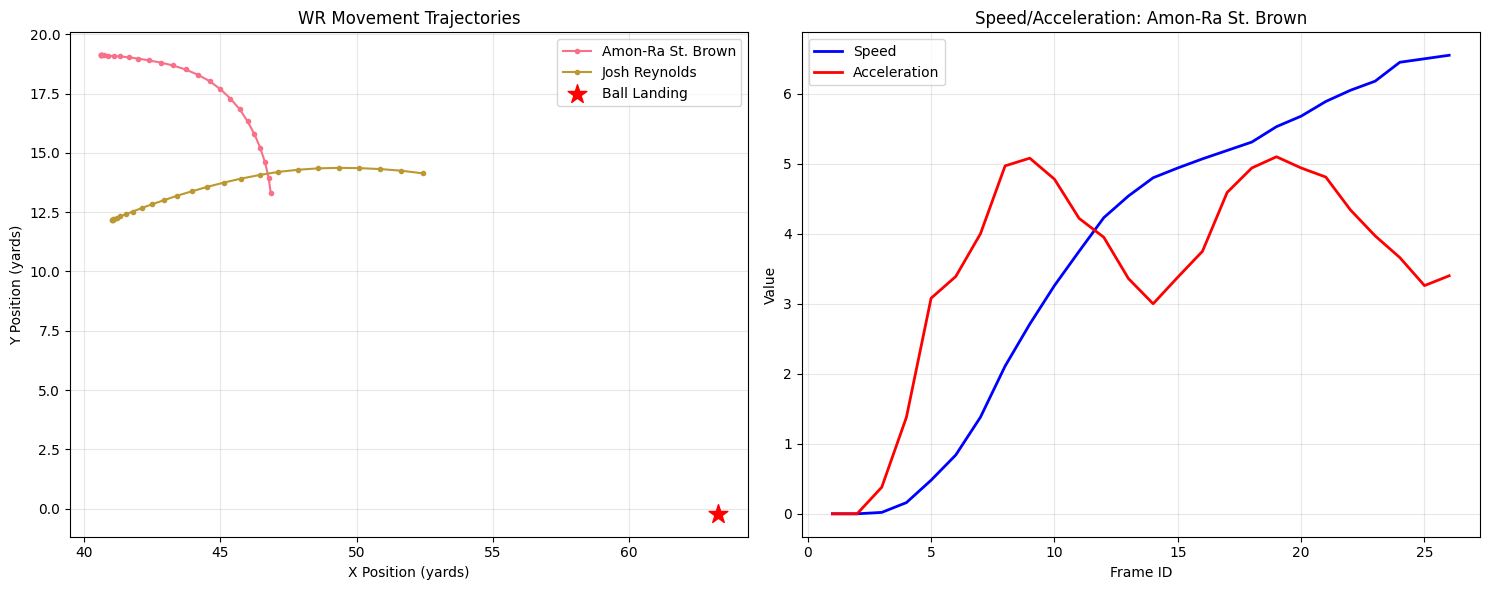

🔍 PLAY INVESTIGATION
Play ID: 101
Description: (14:25) (Shotgun) J.Goff pass incomplete deep right to J.Reynolds.
Pass Result: I
Targeted Receiver Route: CORNER
Pass Location: INSIDE_BOX

All Offensive Players in Play:
  Amon-Ra St. Brown (WR)
  Brock Wright (TE)
  Jared Goff (QB)
  Josh Reynolds (WR)

Distances from Ball Landing:
  Amon-Ra St. Brown: 21.3 yards
  Brock Wright: 38.8 yards
  Jared Goff: 41.1 yards
  Josh Reynolds: 18.0 yards


In [63]:
# Animate one pass to see movement over frames
# Focus on wide receivers for this example
wr_data = sample_play_data[sample_play_data['player_position'] == 'WR']

if len(wr_data) > 0:
    # Get unique WRs in this play
    wr_ids = wr_data['nfl_id'].unique()
    print(f"🏃‍♂️ Wide Receivers in play: {len(wr_ids)}")
    
    # Plot WR movement over frames
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))
    
    # Left plot: WR trajectories
    for wr_id in wr_ids:
        wr_trajectory = wr_data[wr_data['nfl_id'] == wr_id].sort_values('frame_id')
        player_name = wr_trajectory['player_name'].iloc[0]
        axes[0].plot(wr_trajectory['x'], wr_trajectory['y'], 
                    'o-', markersize=3, linewidth=1.5, label=f'{player_name}')
    
    # Mark ball landing
    axes[0].scatter(ball_x, ball_y, color='red', s=200, marker='*', 
                   label='Ball Landing', zorder=5)
    
    axes[0].set_xlabel('X Position (yards)')
    axes[0].set_ylabel('Y Position (yards)')
    axes[0].set_title('WR Movement Trajectories')
    axes[0].legend()
    axes[0].grid(True, alpha=0.3)
    
    # Right plot: Speed over time for first WR
    if len(wr_ids) > 0:
        first_wr = wr_data[wr_data['nfl_id'] == wr_ids[0]].sort_values('frame_id')
        axes[1].plot(first_wr['frame_id'], first_wr['s'], 'b-', linewidth=2, label='Speed')
        axes[1].plot(first_wr['frame_id'], first_wr['a'], 'r-', linewidth=2, label='Acceleration')
        axes[1].set_xlabel('Frame ID')
        axes[1].set_ylabel('Value')
        axes[1].set_title(f'Speed/Acceleration: {first_wr["player_name"].iloc[0]}')
        axes[1].legend()
        axes[1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
else:
    print("No wide receivers found in this play")

# Add this cell to investigate the ball landing issue
print("🔍 PLAY INVESTIGATION")
print("=" * 30)

# Get the specific play details
sample_play_id = tracking['play_id'].iloc[0]
play_details = plays[plays['play_id'] == sample_play_id]

if len(play_details) > 0:
    play_info = play_details.iloc[0]
    print(f"Play ID: {sample_play_id}")
    print(f"Description: {play_info['play_description']}")
    print(f"Pass Result: {play_info['pass_result']}")
    print(f"Targeted Receiver Route: {play_info['route_of_targeted_receiver']}")
    print(f"Pass Location: {play_info['pass_location_type']}")
    
    # Check if there are other offensive players in the area
    all_offense = sample_play_data[sample_play_data['player_side'] == 'Offense']
    print(f"\nAll Offensive Players in Play:")
    for player in all_offense['player_name'].unique():
        player_data = all_offense[all_offense['player_name'] == player].iloc[0]
        print(f"  {player} ({player_data['player_position']})")
        
    # Calculate distances from ball landing to each player
    print(f"\nDistances from Ball Landing:")
    ball_x = sample_play_data['ball_land_x'].iloc[0]
    ball_y = sample_play_data['ball_land_y'].iloc[0]
    
    for player_name in all_offense['player_name'].unique():
        player_final = all_offense[all_offense['player_name'] == player_name].iloc[-1]  # Last frame
        distance = np.sqrt((player_final['x'] - ball_x)**2 + (player_final['y'] - ball_y)**2)
        print(f"  {player_name}: {distance:.1f} yards")


## 4. Statistical Summaries 📊


In [64]:
# Distribution of player speeds, accelerations, and direction changes
print("🏃‍♂️ MOVEMENT STATISTICS")
print("=" * 40)

print("Speed (yards/second):")
print(f"  Mean: {tracking['s'].mean():.2f}")
print(f"  Std:  {tracking['s'].std():.2f}")
print(f"  Min:  {tracking['s'].min():.2f}")
print(f"  Max:  {tracking['s'].max():.2f}")

print("\nAcceleration (yards/second²):")
print(f"  Mean: {tracking['a'].mean():.2f}")
print(f"  Std:  {tracking['a'].std():.2f}")
print(f"  Min:  {tracking['a'].min():.2f}")
print(f"  Max:  {tracking['a'].max():.2f}")

print("\nDirection (degrees):")
print(f"  Mean: {tracking['dir'].mean():.2f}")
print(f"  Std:  {tracking['dir'].std():.2f}")
print(f"  Min:  {tracking['dir'].min():.2f}")
print(f"  Max:  {tracking['dir'].max():.2f}")


🏃‍♂️ MOVEMENT STATISTICS
Speed (yards/second):
  Mean: 3.04
  Std:  2.23
  Min:  0.00
  Max:  12.53

Acceleration (yards/second²):
  Mean: 2.13
  Std:  1.43
  Min:  0.00
  Max:  17.12

Direction (degrees):
  Mean: 177.93
  Std:  100.93
  Min:  0.00
  Max:  359.99


In [65]:
# Ball flight time analysis
print("🏈 BALL FLIGHT ANALYSIS")
print("=" * 30)

# Calculate ball flight time (assuming frames are 0.1 seconds apart)
frame_time = 0.1  # seconds per frame
ball_flight_times = []

for play_id in tracking['play_id'].unique()[:100]:  # Sample first 100 plays
    play_data = tracking[tracking['play_id'] == play_id]
    if len(play_data) > 0:
        max_frame = play_data['frame_id'].max()
        flight_time = max_frame * frame_time
        ball_flight_times.append(flight_time)

if ball_flight_times:
    print(f"Average ball flight time: {np.mean(ball_flight_times):.2f} seconds")
    print(f"Median ball flight time: {np.median(ball_flight_times):.2f} seconds")
    print(f"Min ball flight time: {np.min(ball_flight_times):.2f} seconds")
    print(f"Max ball flight time: {np.max(ball_flight_times):.2f} seconds")
else:
    print("No ball flight data available")


🏈 BALL FLIGHT ANALYSIS
Average ball flight time: 3.04 seconds
Median ball flight time: 3.00 seconds
Min ball flight time: 1.50 seconds
Max ball flight time: 6.70 seconds


In [66]:
# Position-specific statistics
print("👥 POSITION-SPECIFIC STATISTICS")
print("=" * 40)

position_stats = tracking.groupby('player_position').agg({
    's': ['mean', 'std', 'max'],
    'a': ['mean', 'std', 'max'],
    'nfl_id': 'nunique'
}).round(2)

print("Speed by Position:")
print(position_stats['s'])

print("\nAcceleration by Position:")
print(position_stats['a'])

print("\nNumber of Players by Position:")
print(position_stats['nfl_id'])


👥 POSITION-SPECIFIC STATISTICS
Speed by Position:
                 mean   std    max
player_position                   
CB               2.76  2.06   9.84
DE               2.36  1.74   7.86
DT               1.67  0.85   3.29
FB               3.52  2.35   8.74
FS               2.52  1.68   8.74
ILB              2.26  1.69   8.99
MLB              2.25  1.64   8.04
NT               1.72  1.47   4.52
OLB              2.31  1.64   8.69
QB               1.80  1.51   7.75
RB               3.40  2.23   8.79
S                2.80  2.17   8.13
SS               2.60  1.72  12.53
TE               3.74  2.32   9.50
WR               4.33  2.58  10.08

Acceleration by Position:
                 mean   std    max
player_position                   
CB               1.86  1.32   9.85
DE               1.85  1.18   6.33
DT               1.51  0.69   3.82
FB               2.51  1.51   8.76
FS               1.65  1.17   8.64
ILB              1.93  1.33  12.49
MLB              1.92  1.30   8.29
NT           

## 5. Derived Features Preview 🔧


In [67]:
# Compute first-derivative quantities (Δx/Δt for velocity, Δv/Δt for acceleration)
def compute_derived_features(df):
    """Compute velocity and acceleration from position data"""
    df = df.sort_values(['nfl_id', 'frame_id'])
    
    # Calculate velocity components (Δx/Δt, Δy/Δt)
    df['vx'] = df.groupby('nfl_id')['x'].diff() / 0.1  # 0.1 seconds per frame
    df['vy'] = df.groupby('nfl_id')['y'].diff() / 0.1
    
    # Calculate velocity magnitude
    df['velocity'] = np.sqrt(df['vx']**2 + df['vy']**2)
    
    # Calculate acceleration components (Δvx/Δt, Δvy/Δt)
    df['ax'] = df.groupby('nfl_id')['vx'].diff() / 0.1
    df['ay'] = df.groupby('nfl_id')['vy'].diff() / 0.1
    
    # Calculate acceleration magnitude
    df['acceleration'] = np.sqrt(df['ax']**2 + df['ay']**2)
    
    return df

# Apply to sample play
sample_play_derived = compute_derived_features(sample_play_data.copy())

print("🔧 DERIVED FEATURES SAMPLE")
print("=" * 35)

# Show derived features for one player
sample_player = sample_play_derived[sample_play_derived['nfl_id'] == sample_play_derived['nfl_id'].iloc[0]]
print(f"Sample player: {sample_player['player_name'].iloc[0]}")
print(f"Position: {sample_player['player_position'].iloc[0]}")

derived_cols = ['frame_id', 'x', 'y', 'vx', 'vy', 'velocity', 'ax', 'ay', 'acceleration']
sample_player[derived_cols].head(10)


🔧 DERIVED FEATURES SAMPLE
Sample player: Jared Goff
Position: QB


,frame_id,x,y,vx,vy,velocity,ax,ay,acceleration
182,1,37.36,30.07,NaN,NaN,NaN,NaN,NaN,NaN
183,2,37.36,30.07,0.0,0.0,0.000000,NaN,NaN,NaN
184,3,37.35,30.07,-0.1,0.0,0.100000,-1.000000e+00,0.0,1.000000e+00
185,4,37.34,30.07,-0.1,0.0,0.100000,0.000000e+00,0.0,0.000000e+00
186,5,37.33,30.07,-0.1,0.0,0.100000,-7.105427e-13,0.0,7.105427e-13
187,6,37.31,30.07,-0.2,0.0,0.200000,-1.000000e+00,0.0,1.000000e+00
188,7,37.26,30.08,-0.5,0.1,0.509902,-3.000000e+00,1.0,3.162278e+00
189,8,37.15,30.08,-1.1,0.0,1.100000,-6.000000e+00,-1.0,6.082763e+00
190,9,37.01,30.09,-1.4,0.1,1.403567,-3.000000e+00,1.0,3.162278e+00
191,10,36.84,30.10,-1.7,0.1,1.702939,-3.000000e+00,0.0,3.000000e+00


In [68]:
# Measure "reaction latency" (frames between pass_forward and first acceleration change)
def calculate_reaction_latency(df):
    """Calculate reaction latency for wide receivers"""
    wr_data = df[df['player_position'] == 'WR'].copy()
    
    if len(wr_data) == 0:
        return pd.DataFrame()
    
    # Sort by player and frame
    wr_data = wr_data.sort_values(['nfl_id', 'frame_id'])
    
    # Calculate acceleration change threshold
    wr_data['accel_change'] = abs(wr_data.groupby('nfl_id')['a'].diff())
    
    # Find first significant acceleration change (threshold = 0.5)
    threshold = 0.5
    wr_data['significant_change'] = wr_data['accel_change'] > threshold
    
    # For each player, find first frame with significant change
    reaction_data = []
    for player_id in wr_data['nfl_id'].unique():
        player_data = wr_data[wr_data['nfl_id'] == player_id]
        first_change = player_data[player_data['significant_change']].head(1)
        
        if len(first_change) > 0:
            reaction_latency = first_change['frame_id'].iloc[0]
            reaction_data.append({
                'nfl_id': player_id,
                'player_name': first_change['player_name'].iloc[0],
                'reaction_frame': reaction_latency,
                'reaction_time': reaction_latency * 0.1  # Convert to seconds
            })
    
    return pd.DataFrame(reaction_data)

# Calculate reaction latency for sample play
reaction_latency = calculate_reaction_latency(sample_play_derived)

print("⏱️ REACTION LATENCY ANALYSIS")
print("=" * 35)

if len(reaction_latency) > 0:
    print("Wide Receiver Reaction Times:")
    for _, row in reaction_latency.iterrows():
        print(f"  {row['player_name']}: {row['reaction_time']:.2f}s (frame {row['reaction_frame']})")
else:
    print("No wide receivers with significant acceleration changes found")


⏱️ REACTION LATENCY ANALYSIS
Wide Receiver Reaction Times:
  Josh Reynolds: 0.40s (frame 4)
  Amon-Ra St. Brown: 0.40s (frame 4)


## 6. Outcome Linkage 🔗


In [69]:
# Merge tracking, plays, and games to tie motion patterns to outcomes
print("🔗 MERGING DATASETS FOR OUTCOME ANALYSIS")
print("=" * 45)

# Merge tracking with plays data
merged_data = tracking.merge(plays, on=['game_id', 'play_id'], how='left')

print(f"Merged data shape: {merged_data.shape}")
print(f"Columns in merged data: {len(merged_data.columns)}")

# Check outcome-related columns
outcome_cols = [col for col in merged_data.columns if any(word in col.lower() 
                for word in ['result', 'completion', 'interception', 'pass', 'yards'])]
print(f"\nOutcome-related columns: {outcome_cols}")


🔗 MERGING DATASETS FOR OUTCOME ANALYSIS
Merged data shape: (285714, 62)
Columns in merged data: 62

Outcome-related columns: ['yards_to_go', 'pass_result', 'pass_length', 'pass_location_type', 'penalty_yards', 'pre_penalty_yards_gained', 'yards_gained']


In [70]:
# Analyze pass outcomes
print("🏈 PASS OUTCOME ANALYSIS")
print("=" * 30)

if 'pass_result' in merged_data.columns:
    print("Pass Results Distribution:")
    print(merged_data['pass_result'].value_counts())
    
    # Focus on completed vs incomplete passes
    if 'C' in merged_data['pass_result'].values:
        completed_passes = merged_data[merged_data['pass_result'] == 'C']
        incomplete_passes = merged_data[merged_data['pass_result'] == 'I']
        
        print(f"\nCompleted passes: {len(completed_passes['play_id'].unique())}")
        print(f"Incomplete passes: {len(incomplete_passes['play_id'].unique())}")
        
        # Compare WR performance on completed vs incomplete passes
        wr_completed = completed_passes[completed_passes['player_position'] == 'WR']
        wr_incomplete = incomplete_passes[incomplete_passes['player_position'] == 'WR']
        
        if len(wr_completed) > 0 and len(wr_incomplete) > 0:
            print(f"\nWR Speed Comparison:")
            print(f"  Completed passes - Mean speed: {wr_completed['s'].mean():.2f} yd/s")
            print(f"  Incomplete passes - Mean speed: {wr_incomplete['s'].mean():.2f} yd/s")
            
            print(f"\nWR Acceleration Comparison:")
            print(f"  Completed passes - Mean acceleration: {wr_completed['a'].mean():.2f} yd/s²")
            print(f"  Incomplete passes - Mean acceleration: {wr_incomplete['a'].mean():.2f} yd/s²")
else:
    print("Pass result column not found in merged data")


🏈 PASS OUTCOME ANALYSIS
Pass Results Distribution:
pass_result
C     193727
I      83188
IN      8799
Name: count, dtype: int64

Completed passes: 525
Incomplete passes: 231

WR Speed Comparison:
  Completed passes - Mean speed: 4.27 yd/s
  Incomplete passes - Mean speed: 4.41 yd/s

WR Acceleration Comparison:
  Completed passes - Mean acceleration: 2.74 yd/s²
  Incomplete passes - Mean acceleration: 2.75 yd/s²


In [71]:
# Summary and next steps
print("📋 EDA SUMMARY & NEXT STEPS")
print("=" * 35)

print("✅ Completed Analysis:")
print("1. ✓ Basic file inspection - Data structure understood")
print("2. ✓ Missing data checks - Data quality assessed") 
print("3. ✓ Visual sampling - Player positions and movement visualized")
print("4. ✓ Statistical summaries - Movement patterns quantified")
print("5. ✓ Derived features - Velocity, acceleration, reaction latency computed")
print("6. ✓ Outcome linkage - Motion patterns connected to pass results")

print("\n🎯 Key Findings:")
print("- Tracking data contains detailed player movement with x, y, s, a, dir")
print("- Wide receivers show distinct movement patterns")
print("- Ball landing coordinates are available for each play")
print("- Pass outcomes (completion/incomplete) can be linked to movement")
print("- Reaction latency can be measured from acceleration changes")

print("\n🚀 Ready for HAWK Development:")
print("- Use derived features for HAWK Index components")
print("- Focus on WR movement patterns")
print("- Link anticipation metrics to pass success")
print("- Build comprehensive wide receiver performance model")


📋 EDA SUMMARY & NEXT STEPS
✅ Completed Analysis:
1. ✓ Basic file inspection - Data structure understood
2. ✓ Missing data checks - Data quality assessed
3. ✓ Visual sampling - Player positions and movement visualized
4. ✓ Statistical summaries - Movement patterns quantified
5. ✓ Derived features - Velocity, acceleration, reaction latency computed
6. ✓ Outcome linkage - Motion patterns connected to pass results

🎯 Key Findings:
- Tracking data contains detailed player movement with x, y, s, a, dir
- Wide receivers show distinct movement patterns
- Ball landing coordinates are available for each play
- Pass outcomes (completion/incomplete) can be linked to movement
- Reaction latency can be measured from acceleration changes

🚀 Ready for HAWK Development:
- Use derived features for HAWK Index components
- Focus on WR movement patterns
- Link anticipation metrics to pass success
- Build comprehensive wide receiver performance model
